In [2]:
import pandas as pd
import dabest
import glob
import matplotlib as mpl
import seaborn as sns

print("matplotlib v{}".format(mpl.__version__))
print("seaborn v{}".format(sns.__version__))
print("dabest v{}".format(dabest.__version__))

matplotlib v3.1.3
seaborn v0.10.0
dabest v0.3.0


### Create dict for gene name conversion

In [2]:
filteredGeneTable = pd.read_csv("filteredGenesDetails_human_240118.txt",sep='\t')
Gene2Acc = {}
for idx,gene in filteredGeneTable.iterrows():
    Gene2Acc[gene['GeneName']] = gene['AccNum']
filteredGeneTable.head()

,GeneName,AccNum,Chrom,mRNALength,ORFLength,fpUTR_length,tpUTR_length,sumIntronLengths
0,UBE2Q1,NM_017582,chr1,3223,1269,91,1863,6847
1,DUOXA1,NM_001276267,chr15,3032,897,395,1740,9479
2,UBE2Q2,NM_173469,chr15,3098,1128,381,1589,54664
3,RNF10,NM_001330474,chr12,3861,2451,482,928,39404
4,RNF11,NM_014372,chr1,3074,465,484,2125,34101


In [37]:
#GeneGroup = pd.read_csv("../Gene Groups/Erythroid_29102019.csv")
#GeneGroup = pd.read_csv("../Gene Groups/lysosome.txt",sep='\t')
GeneGroup = pd.read_csv("../Gene Groups/spliceosome.txt",sep='\t')
groupLabel = 'splicesome'
GeneGroup.head()

,HGNC ID,Approved symbol,Approved name,Status,Locus type,Previous symbols,Synonyms,Chromosome,NCBI Gene ID,Ensembl gene ID,Vega gene ID,Group ID,Group name
0,HGNC:17040,CASC3,CASC3 exon junction complex subunit,Approved,gene with protein product,NaN,"MLN51, BTZ",17q21.1,22794,ENSG00000108349,OTTHUMG00000133323,1238,Exon junction complex
1,HGNC:18683,EIF4A3,eukaryotic translation initiation factor 4A3,Approved,gene with protein product,DDX48,"KIAA0111, EIF4AIII, Fal1",17q25.3,9775,ENSG00000141543,OTTHUMG00000177538,1238,Exon junction complex
2,HGNC:6815,MAGOH,"mago homolog, exon junction complex subunit",Approved,gene with protein product,NaN,"MAGOHA, MAGOH1",1p32.3,4116,ENSG00000162385,OTTHUMG00000008932,1238,Exon junction complex
3,HGNC:25504,MAGOHB,"mago homolog B, exon junction complex subunit",Approved,gene with protein product,NaN,"FLJ10292, MGN2",12p13.2,55110,ENSG00000111196,OTTHUMG00000168407,1238,Exon junction complex
4,HGNC:9905,RBM8A,RNA binding motif protein 8A,Approved,gene with protein product,RBM8,"ZNRP, BOV-1A, BOV-1B, BOV-1C, RBM8B, Y14",1q21.1,9939,ENSG00000265241,OTTHUMG00000013736,1238,Exon junction complex


In [38]:
AccSelected = {}
for idx,gene in GeneGroup.iterrows():
    if gene['Approved symbol'] in Gene2Acc:
        AccSelected[Gene2Acc[gene['Approved symbol']]] = 1

In [41]:
files = glob.glob("../deseq_yue/withRefSeq/shift15/coding/csv_raw/*.csv")


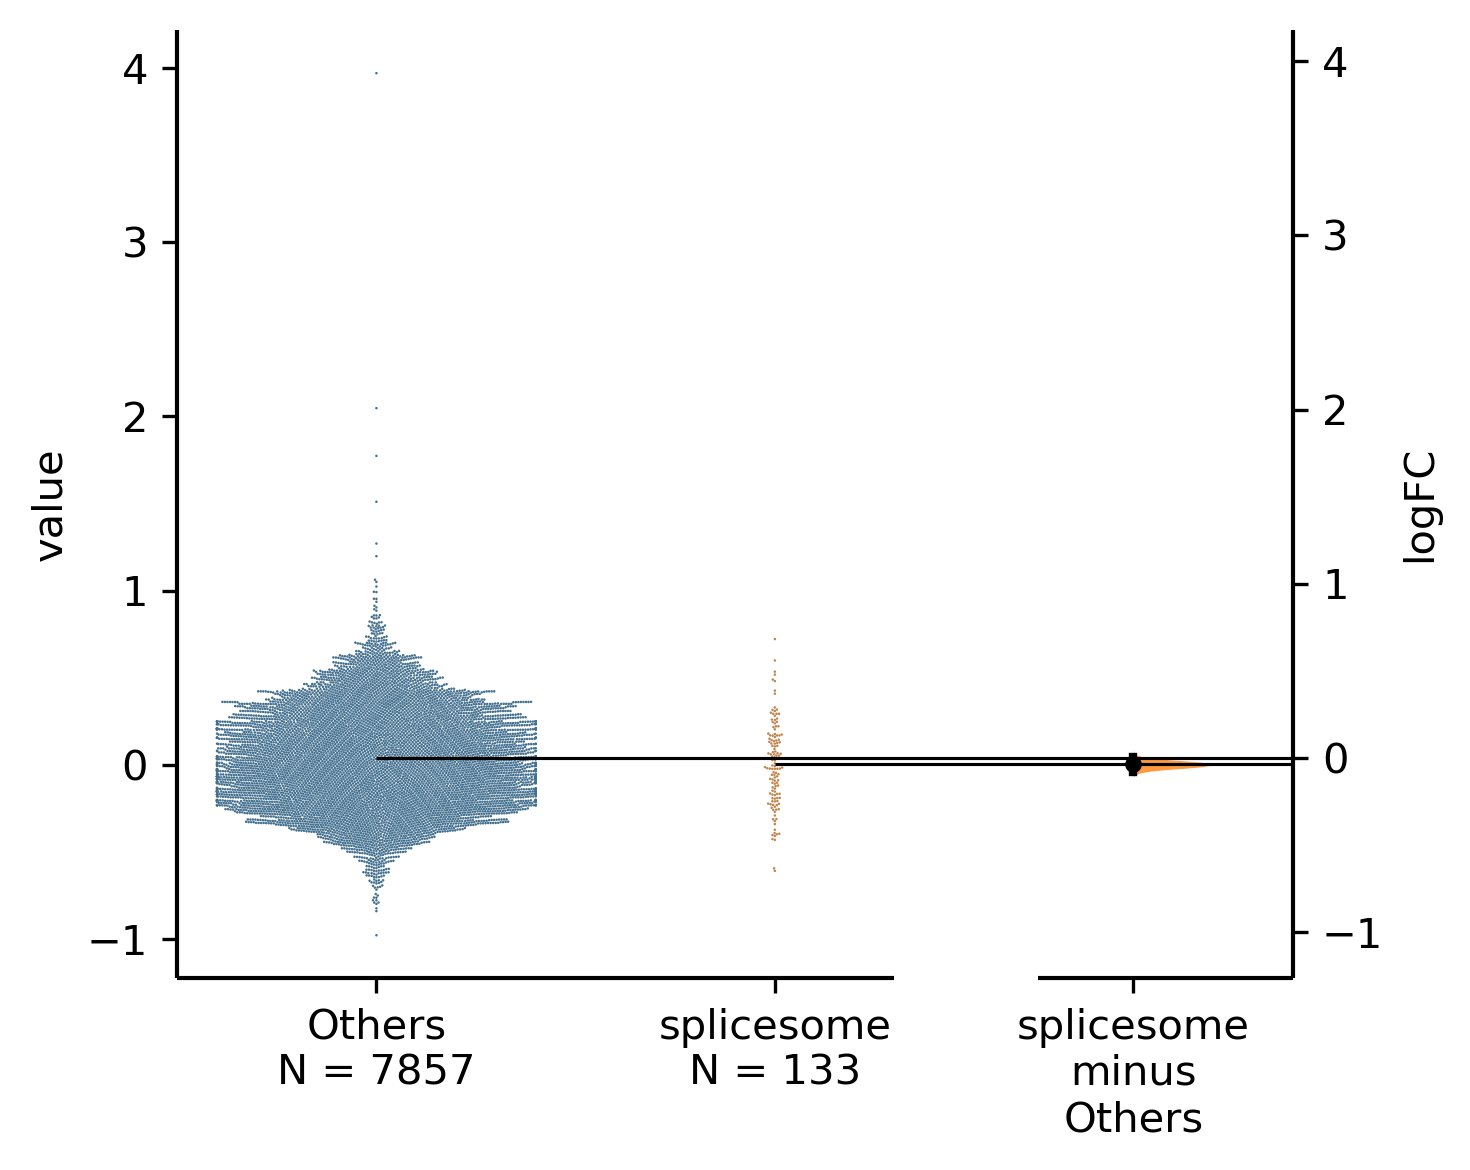

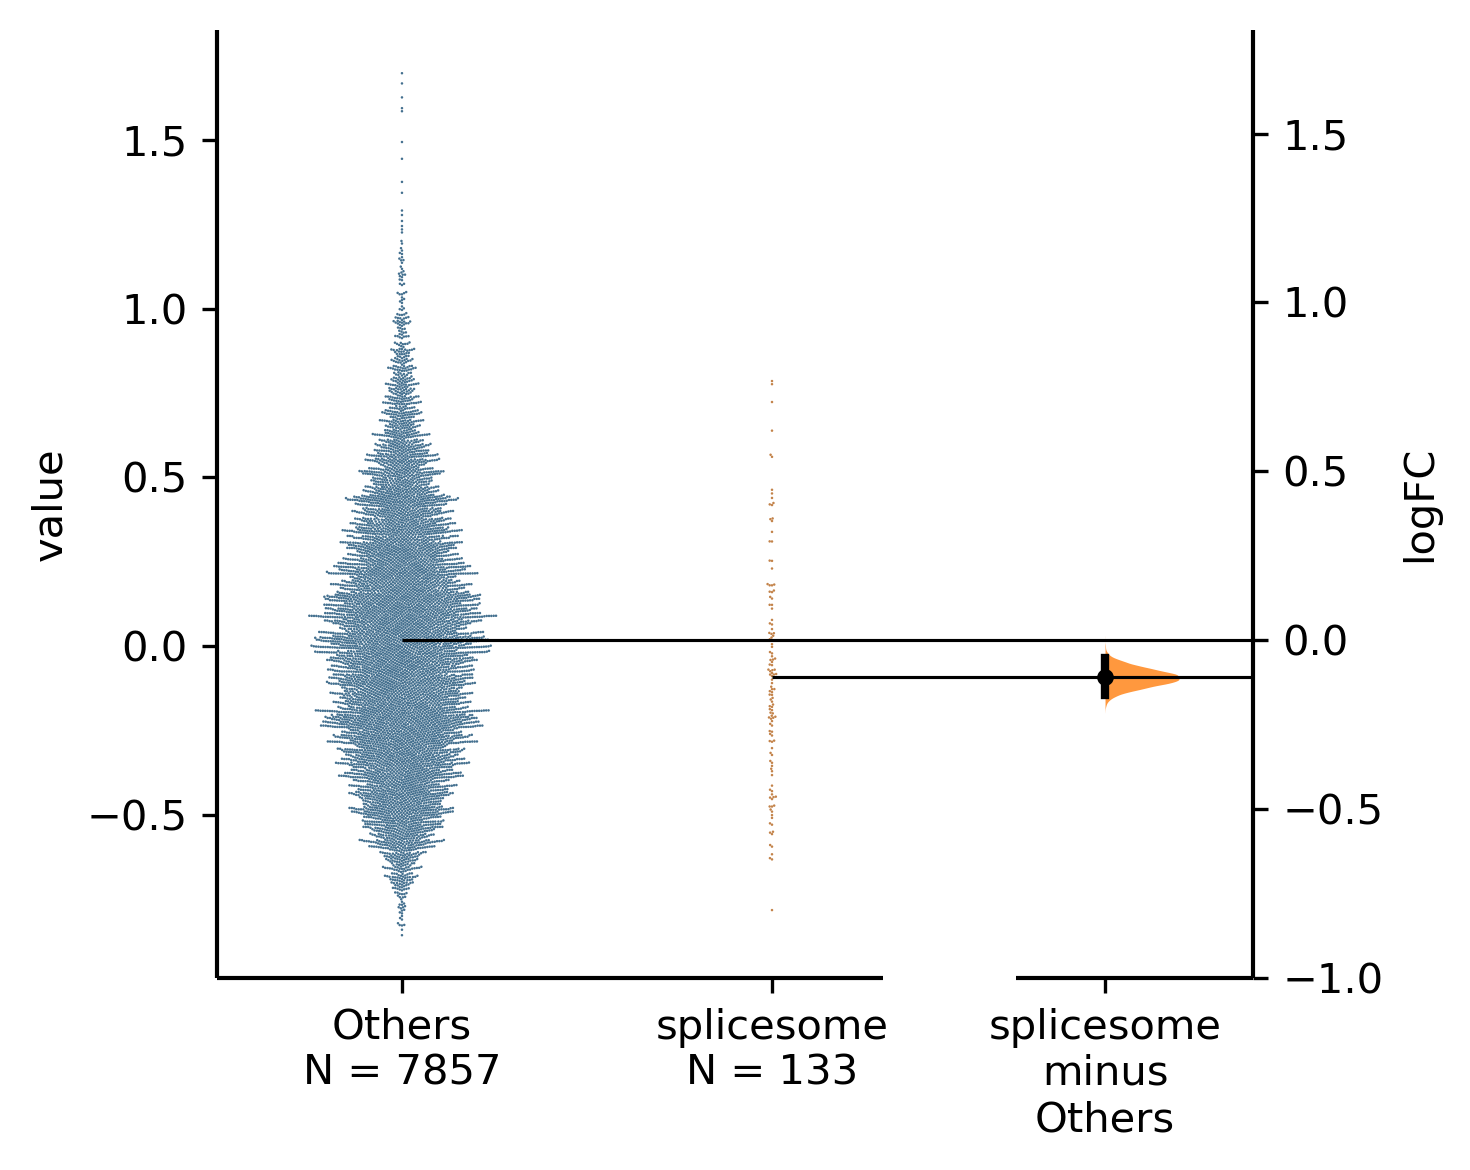

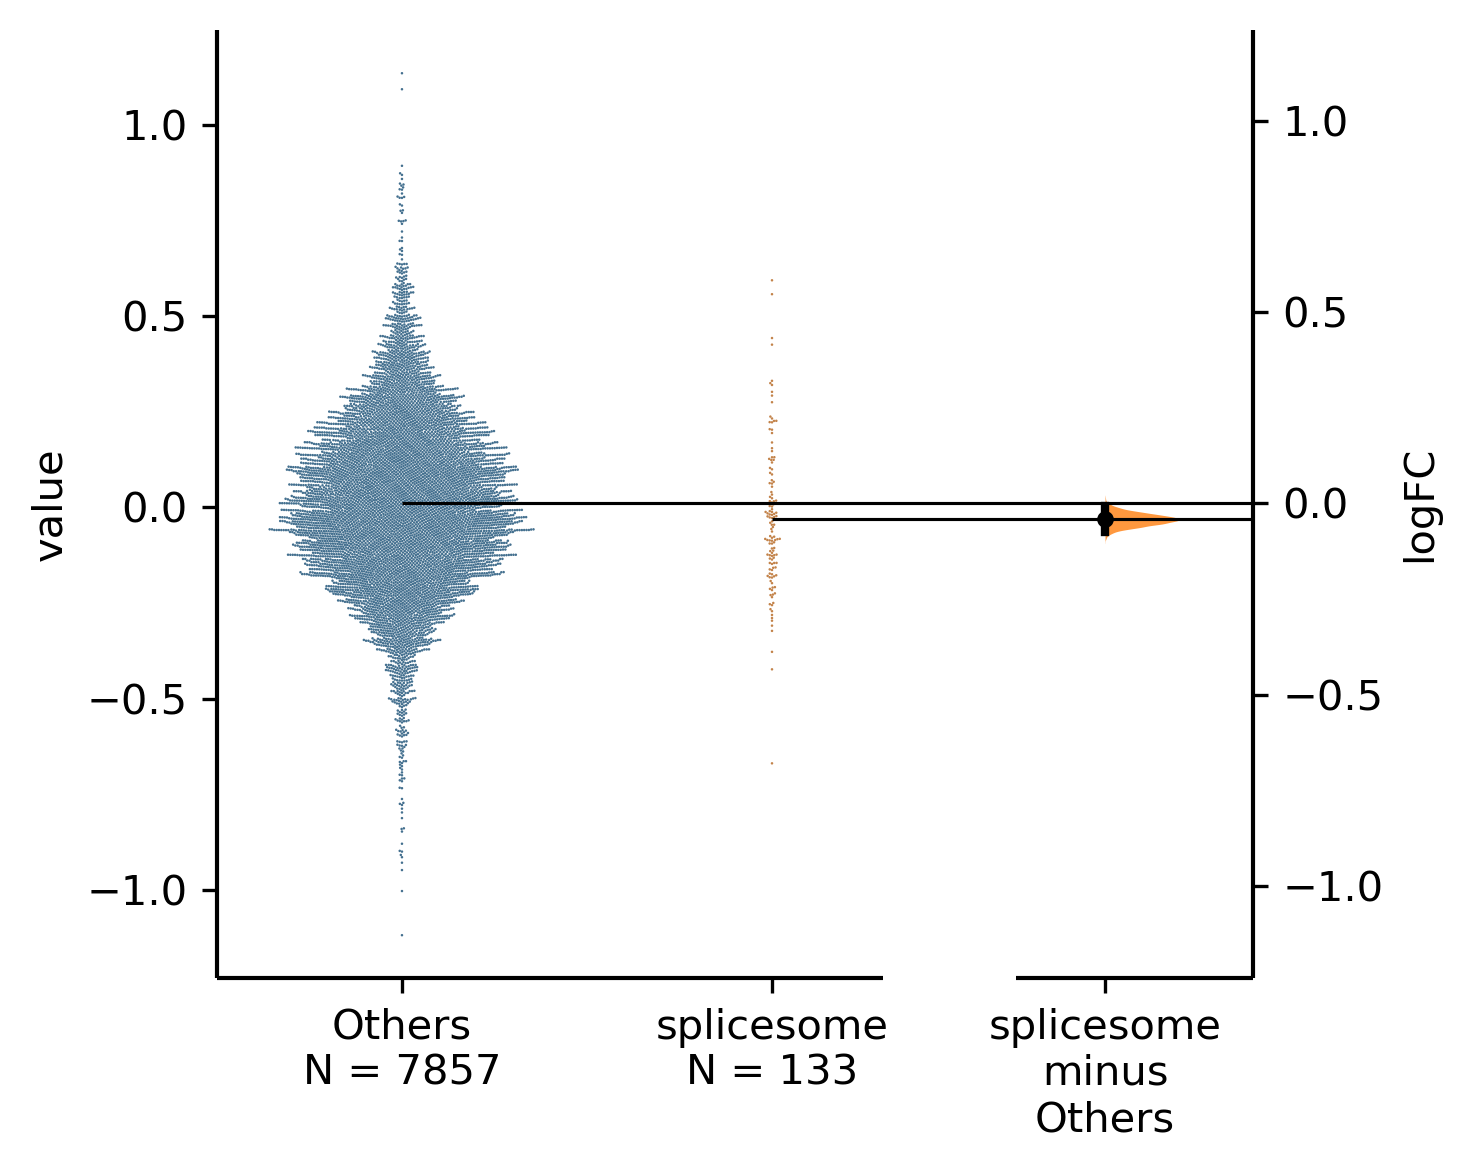

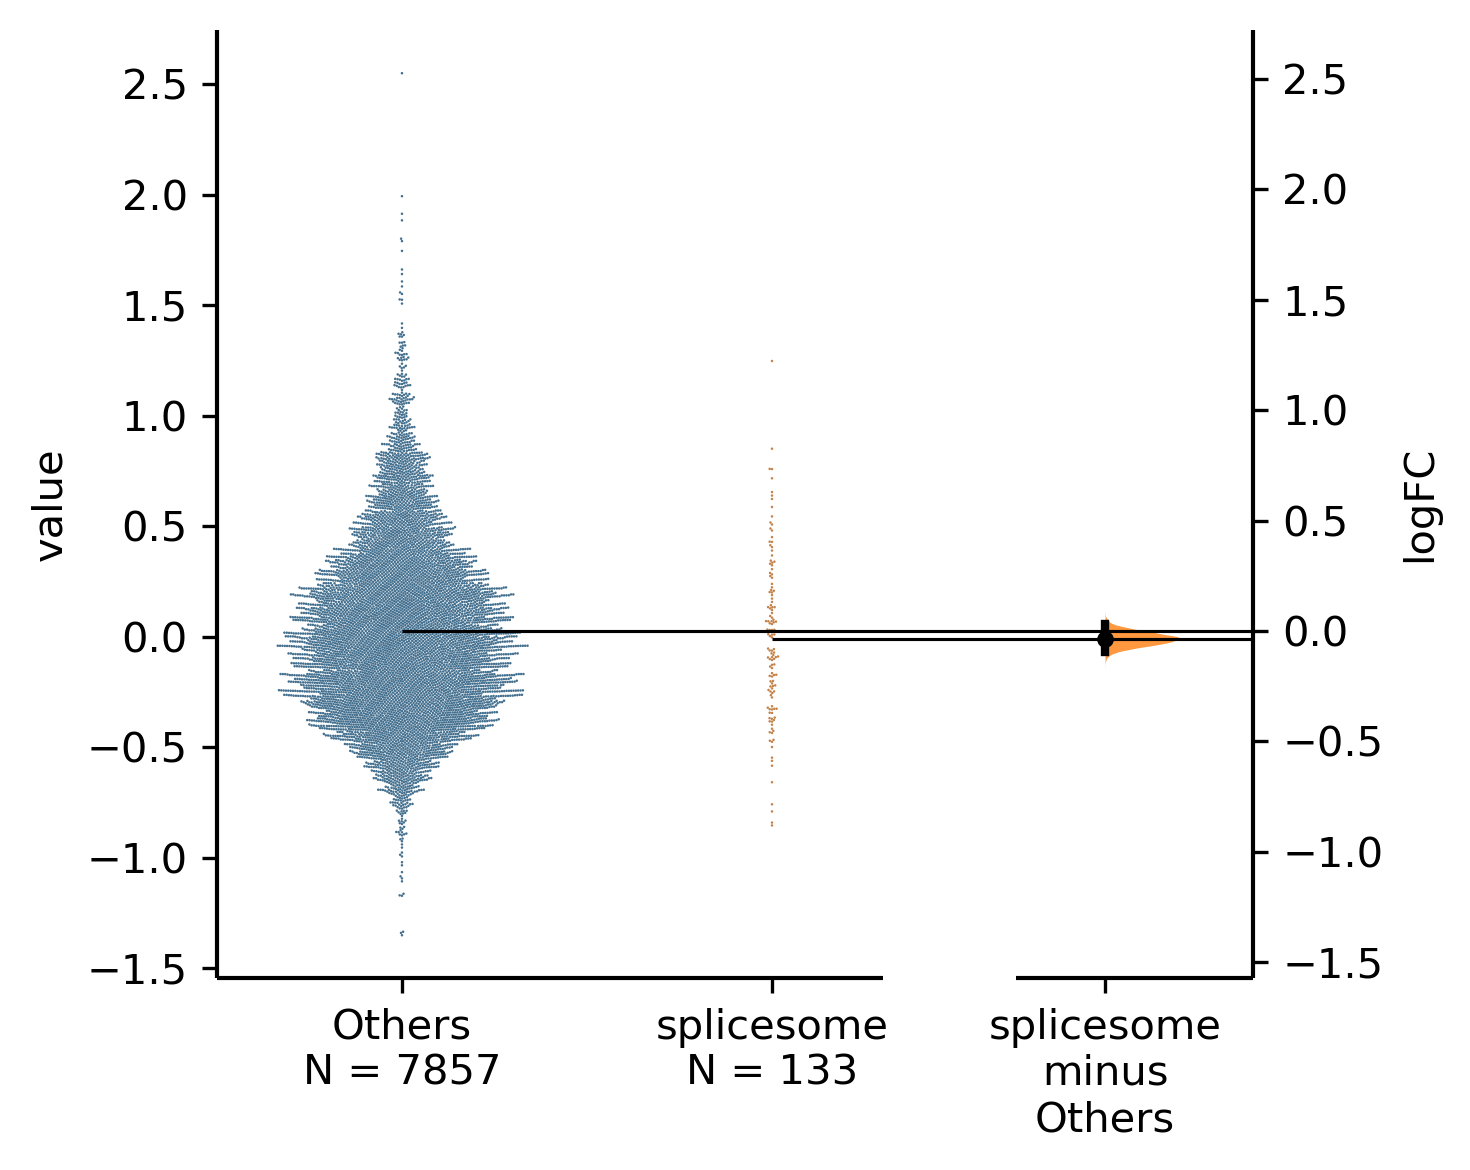

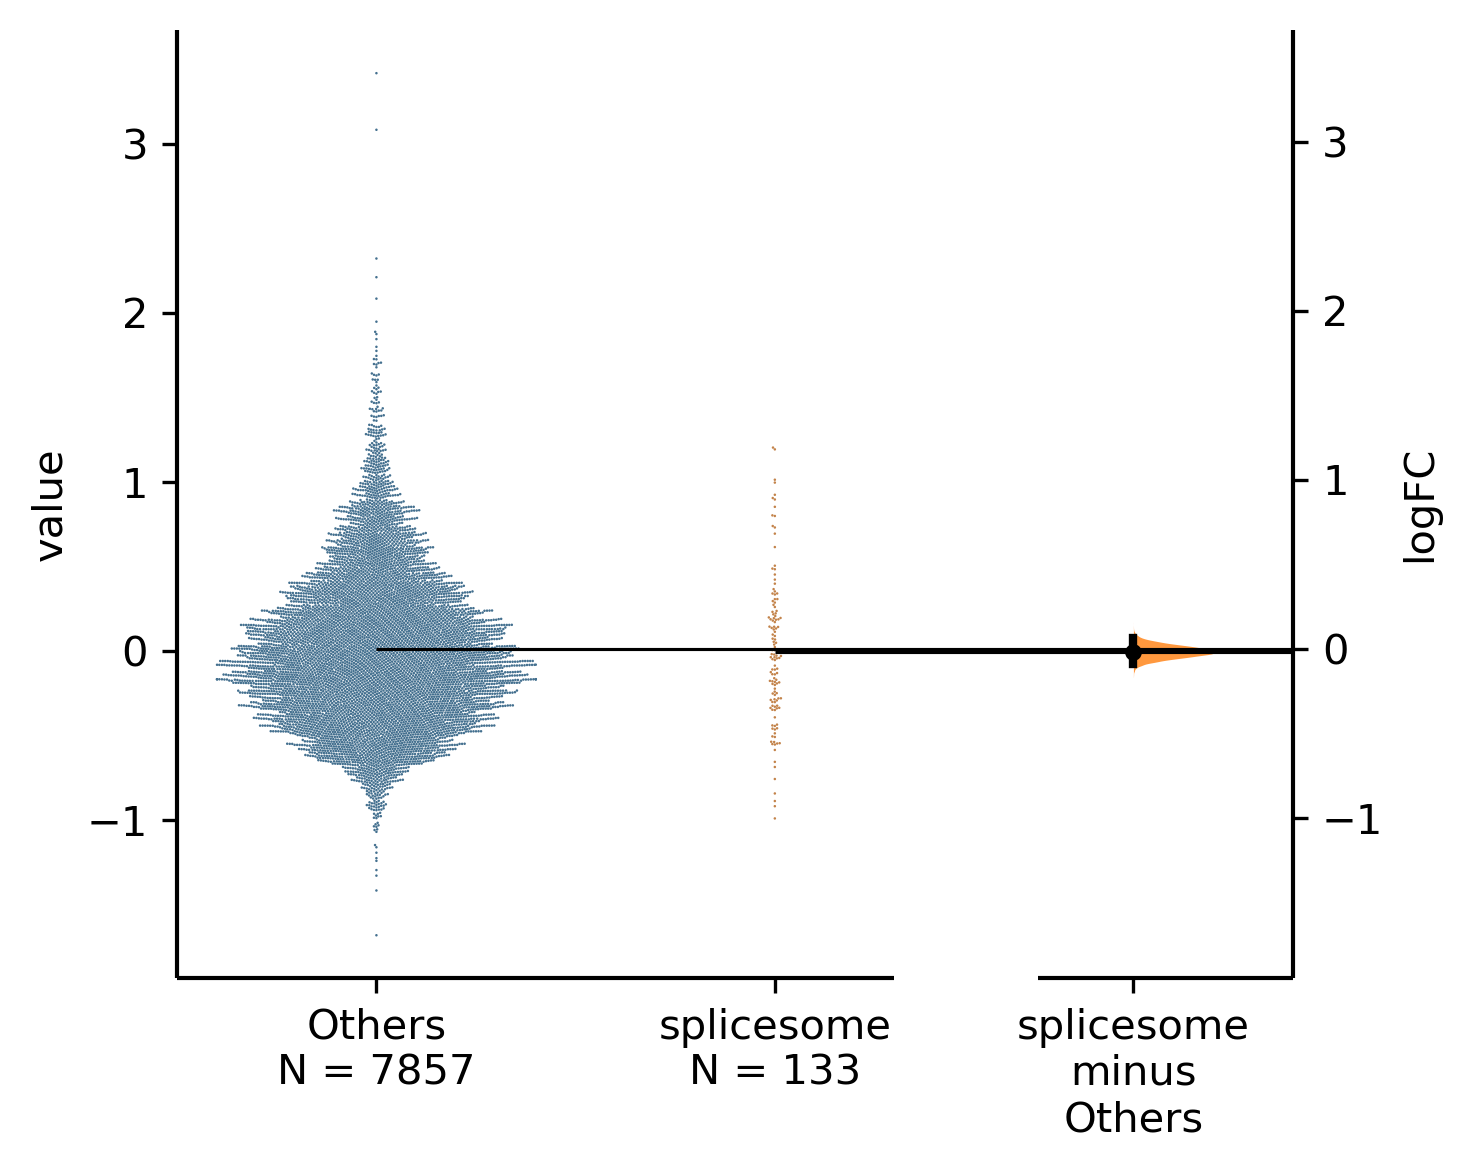

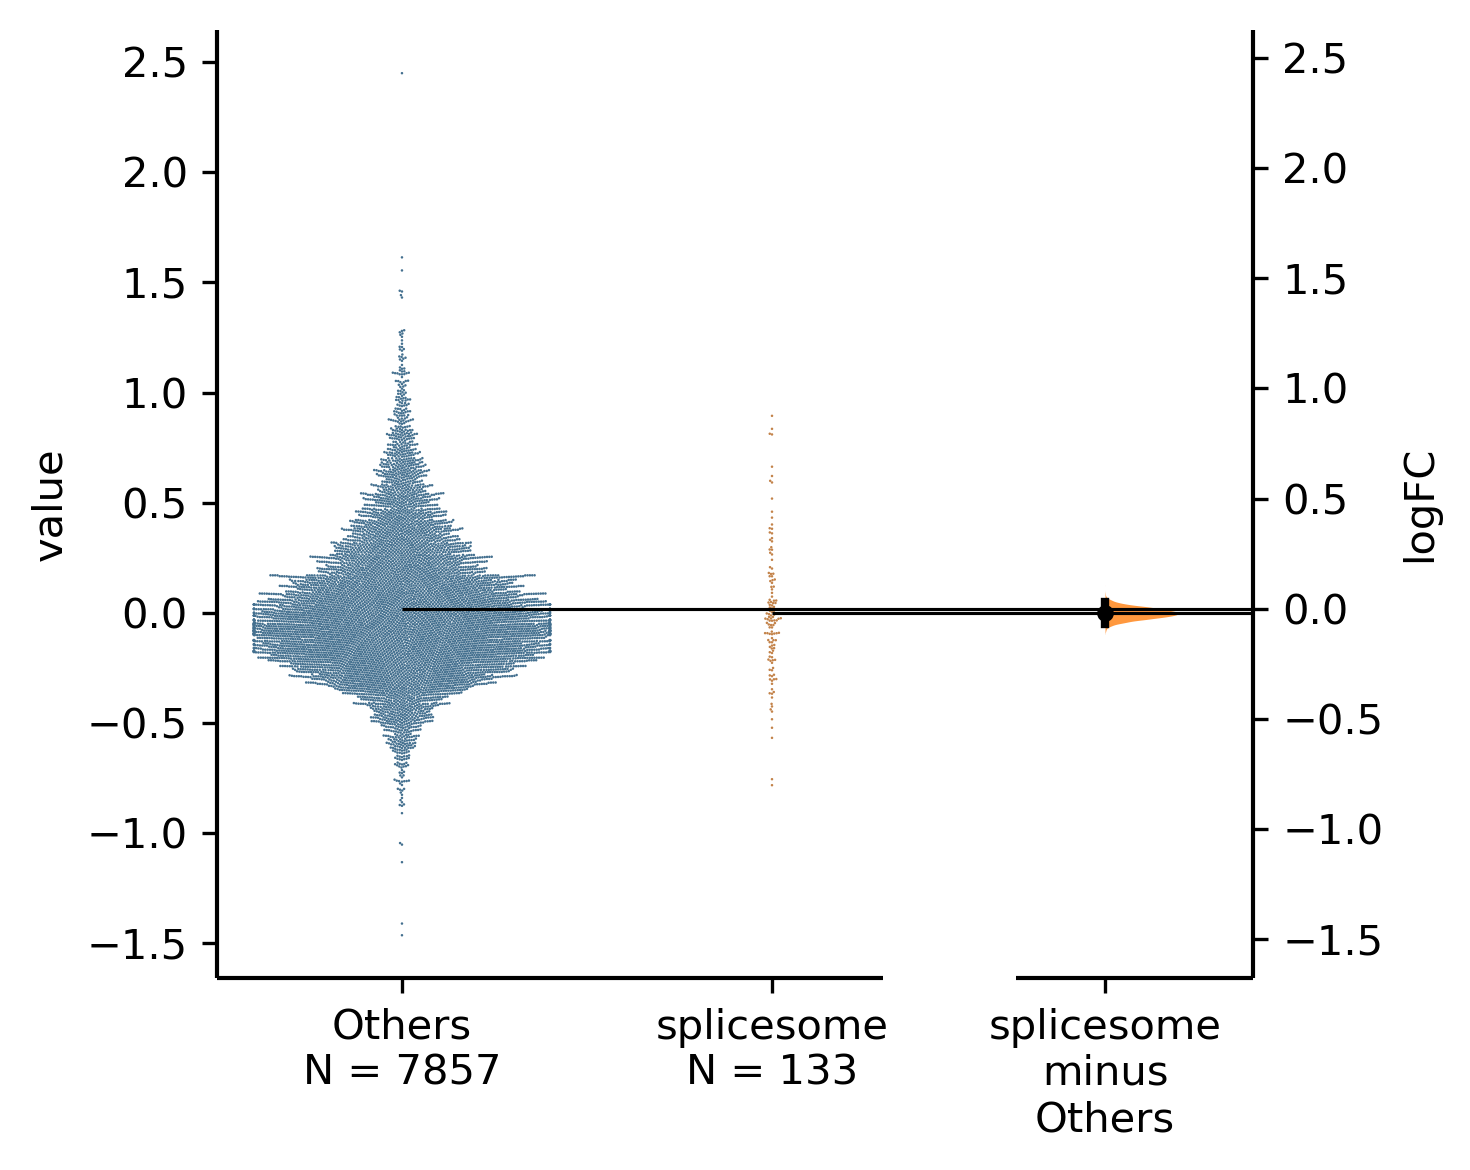

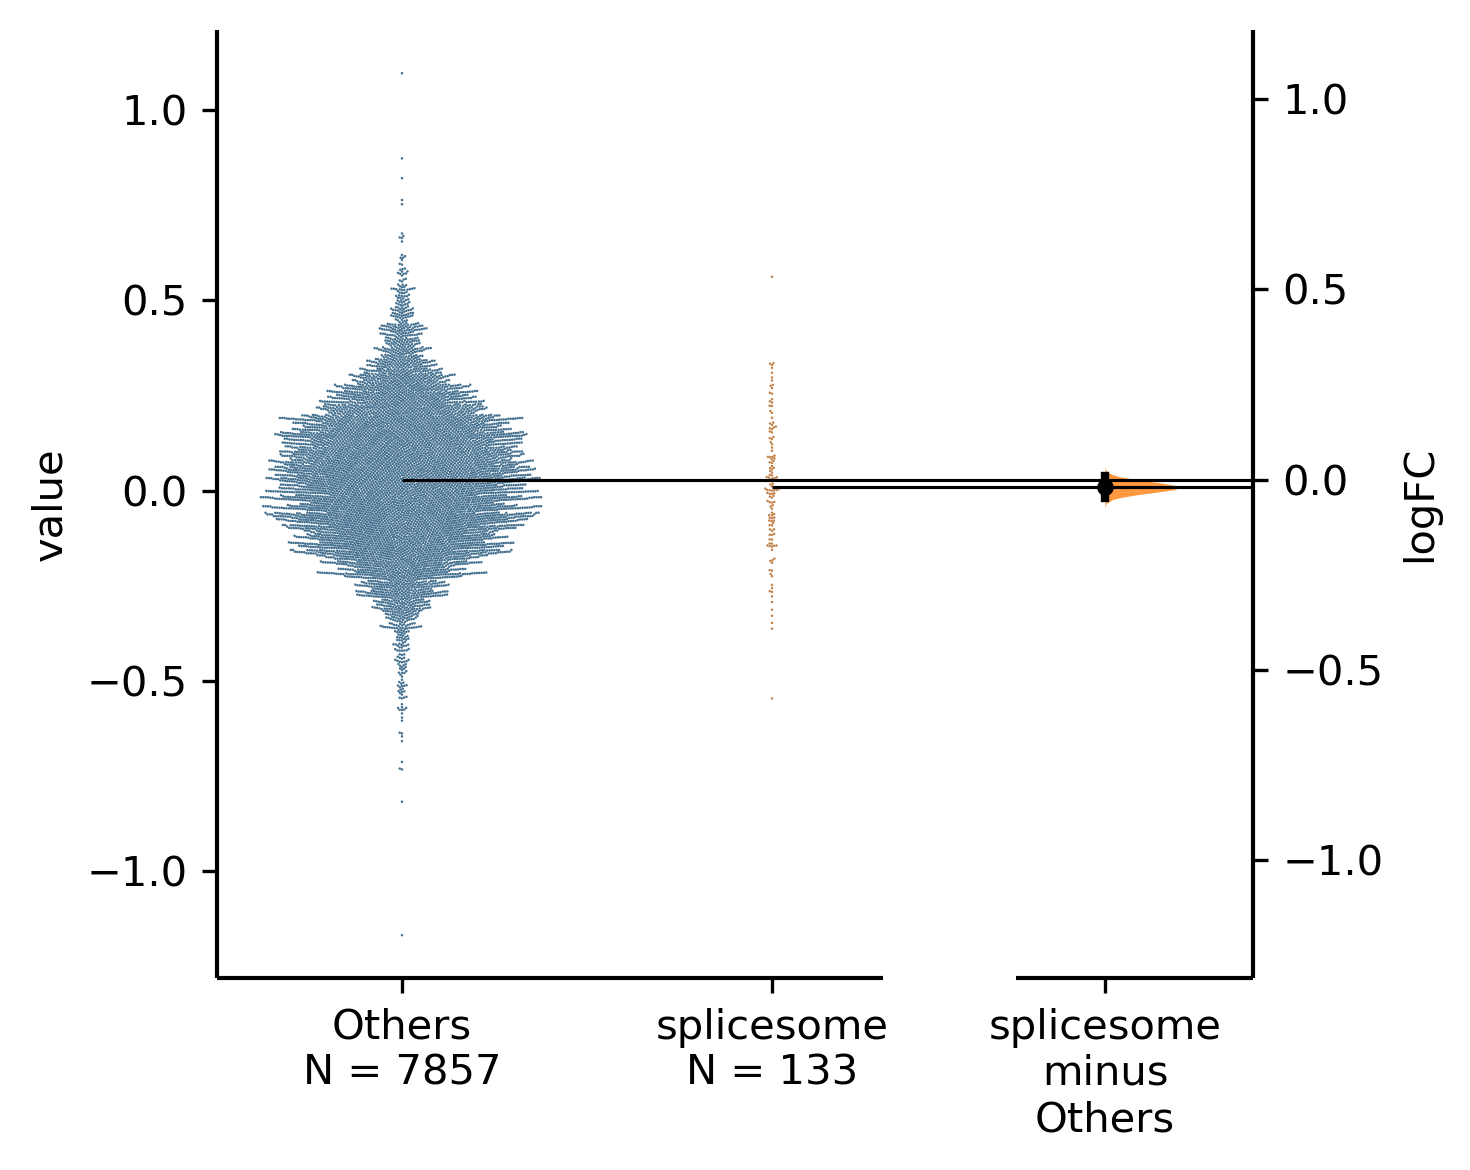

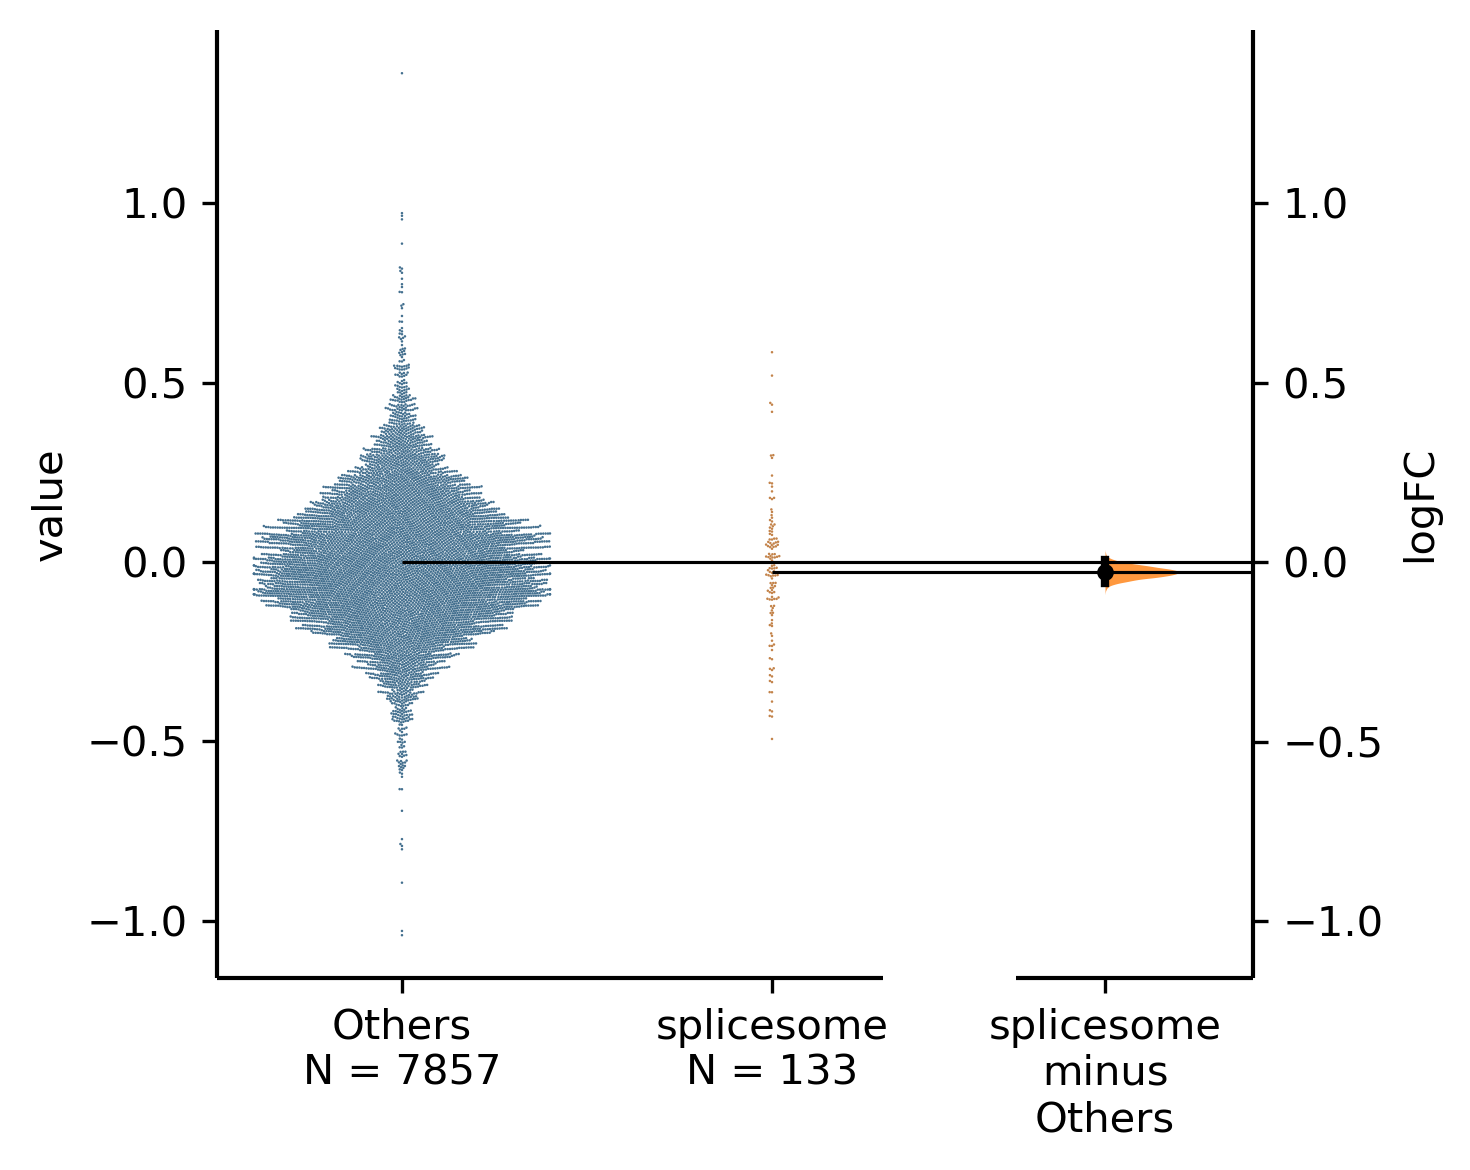

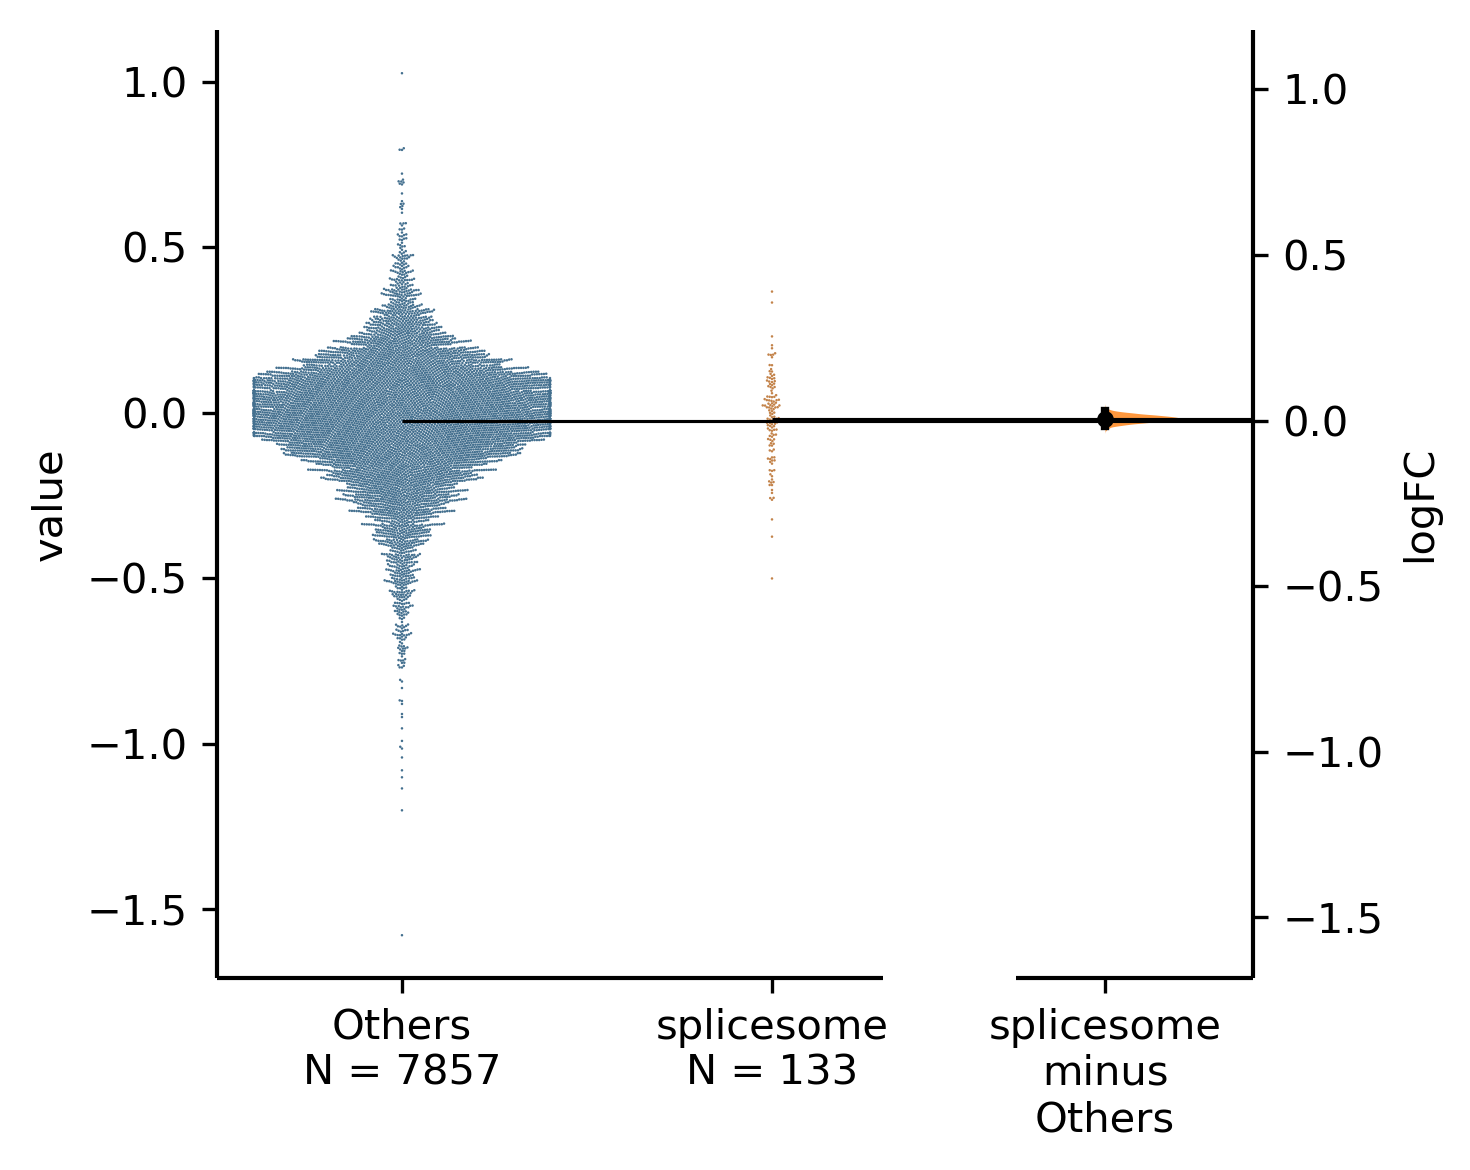

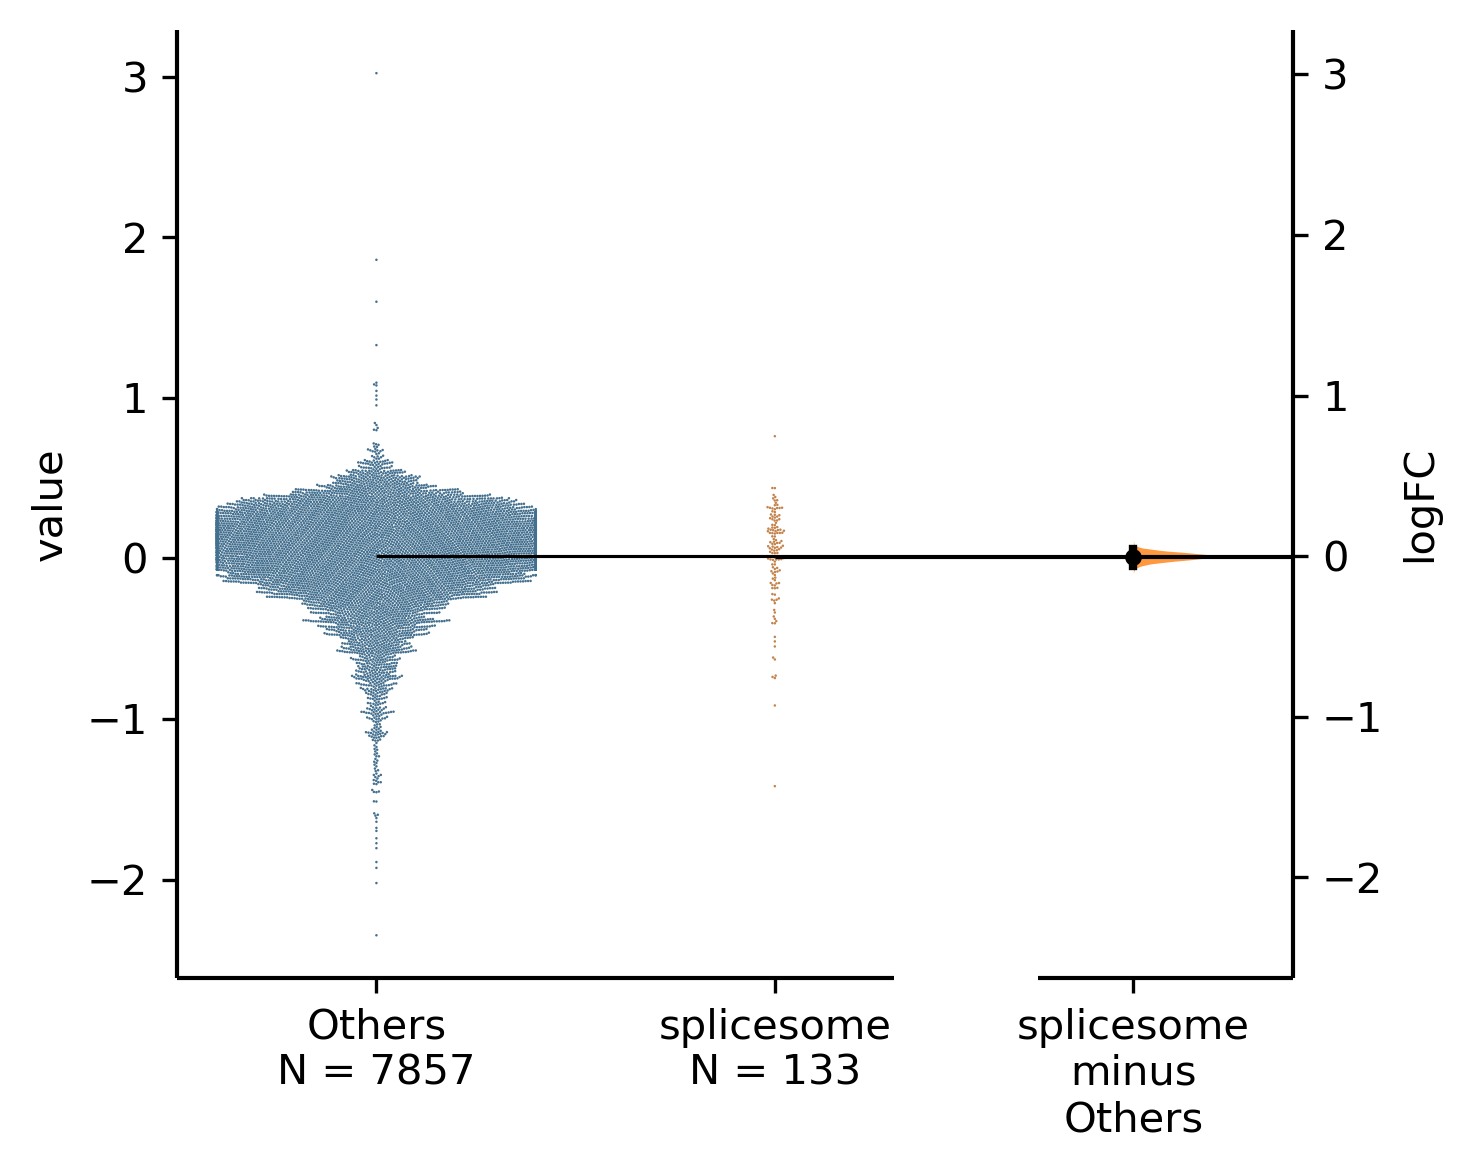

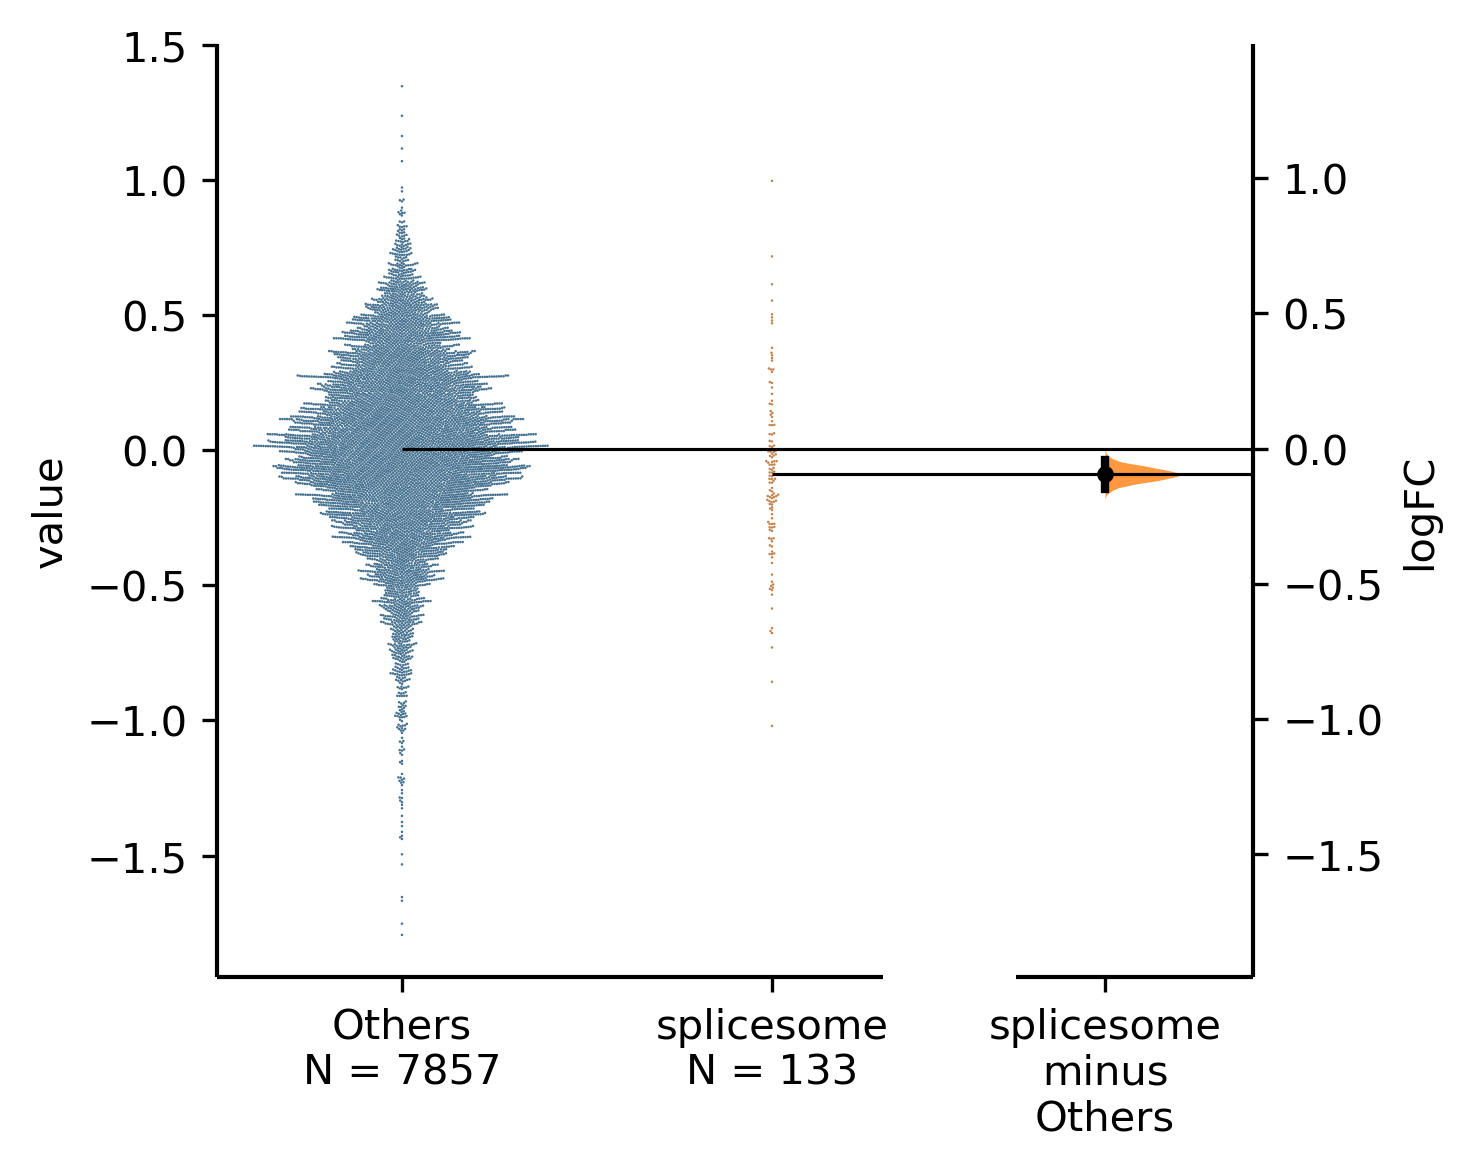

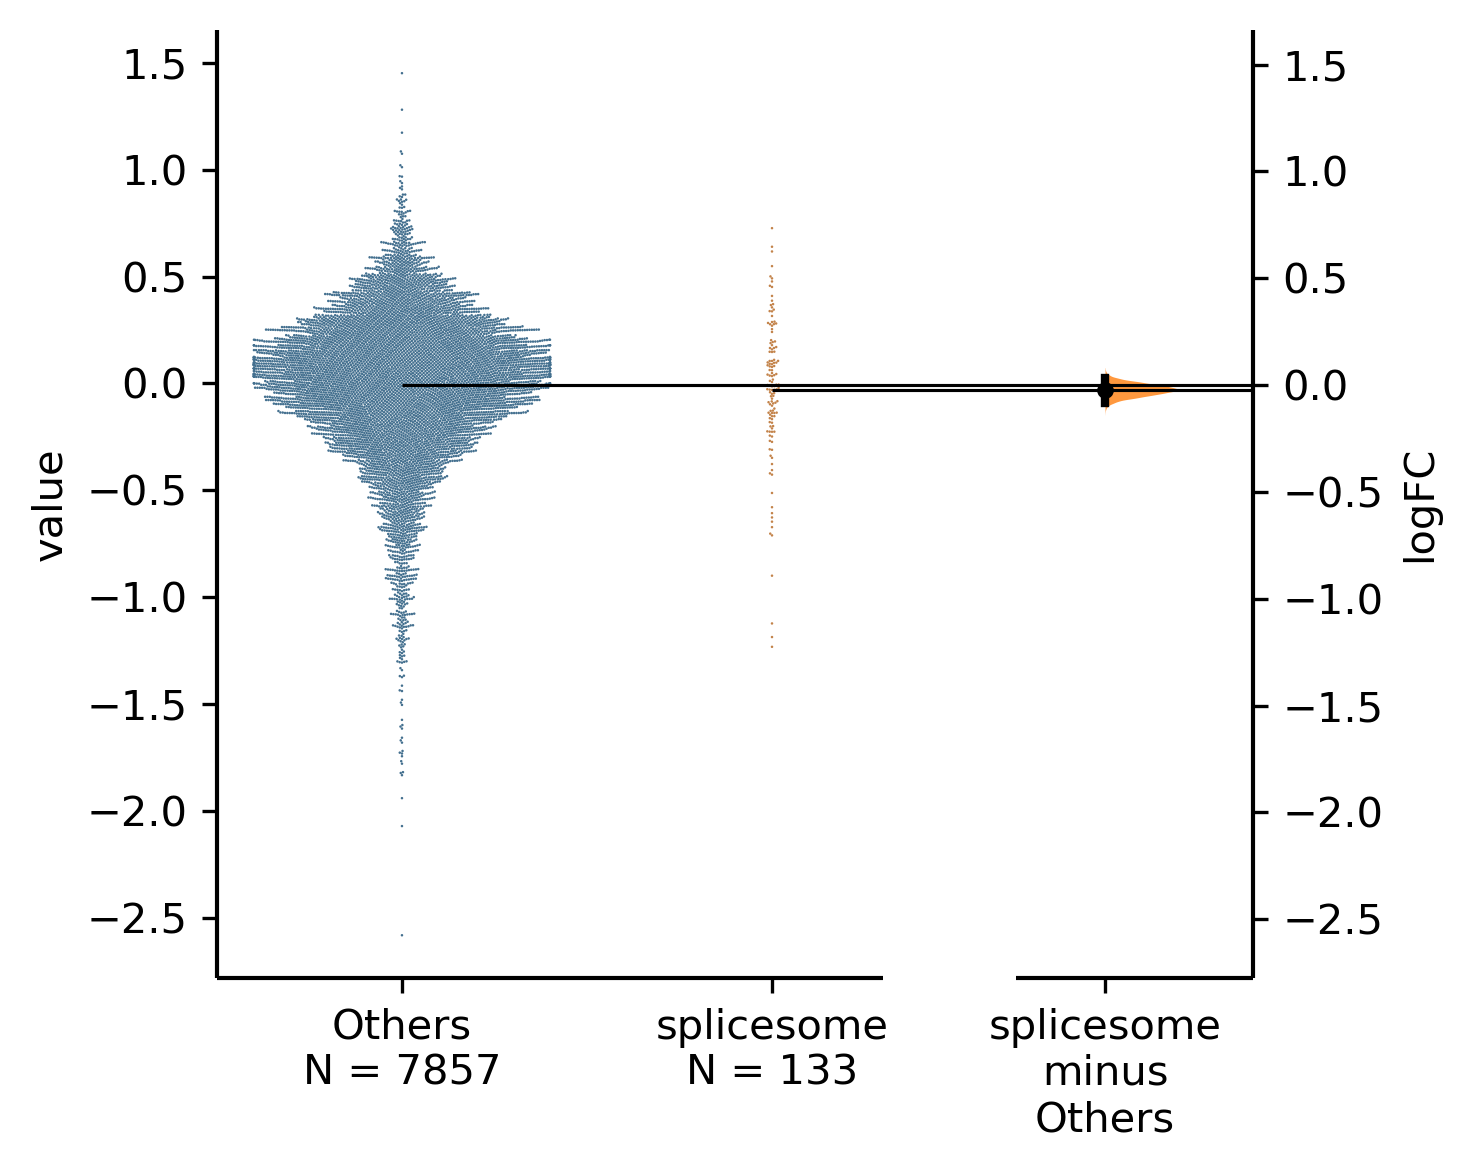

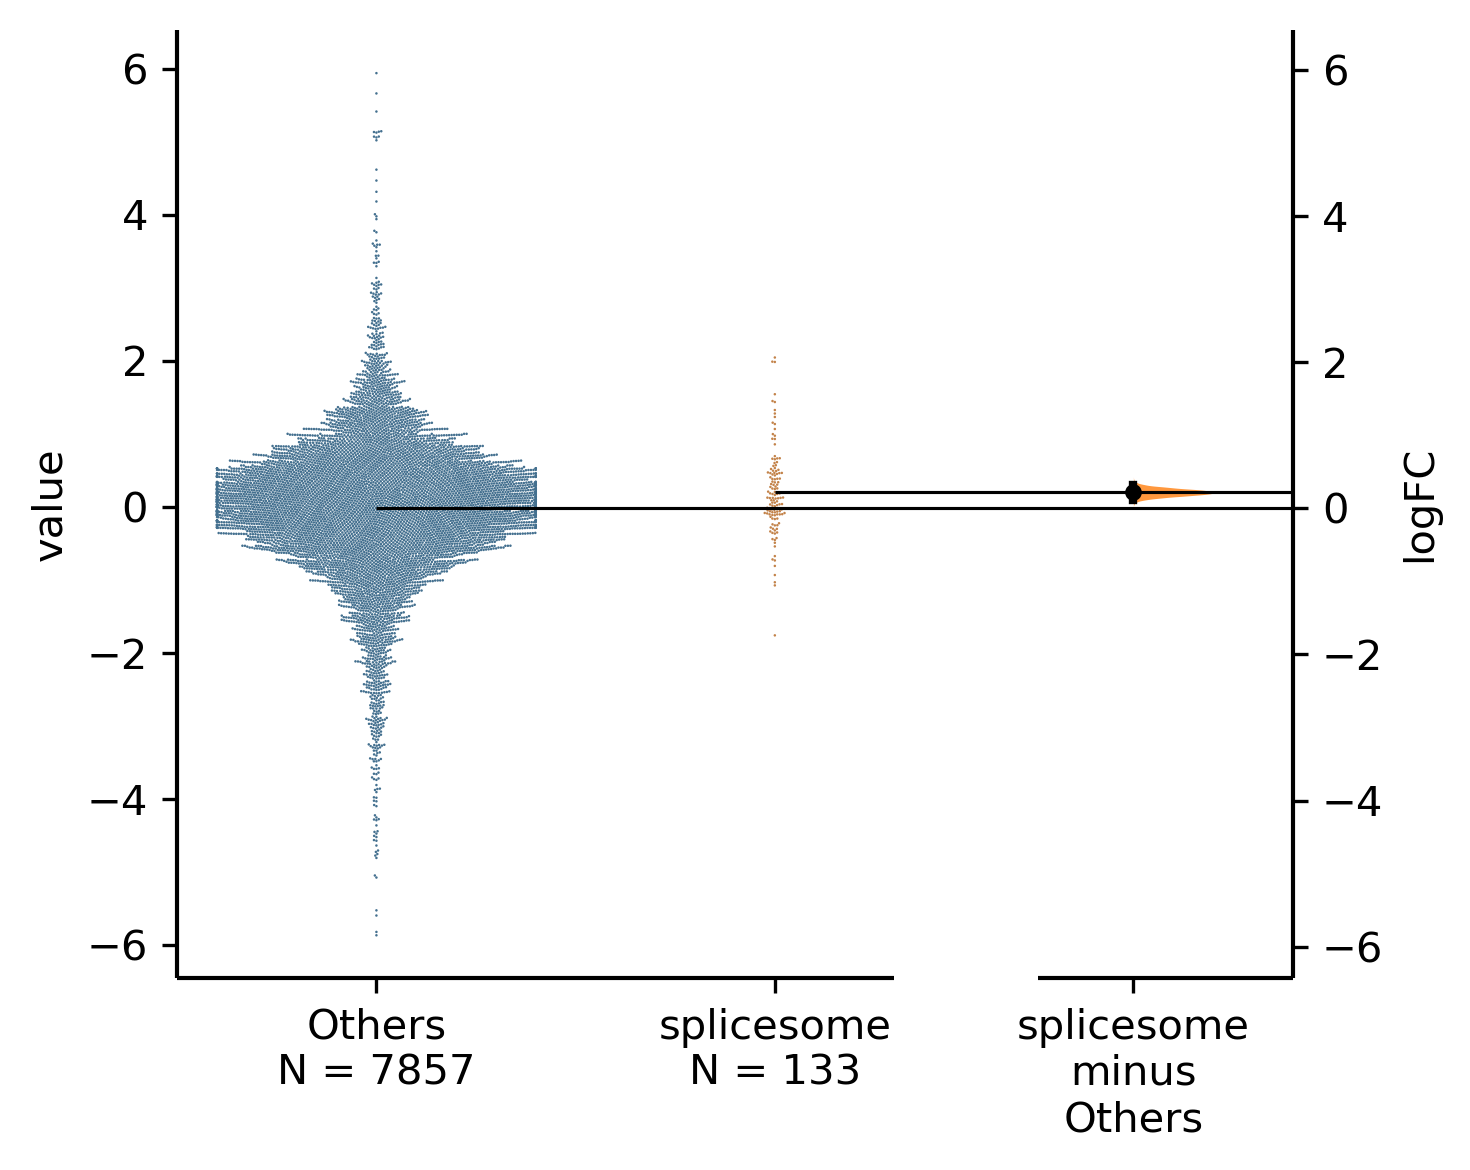

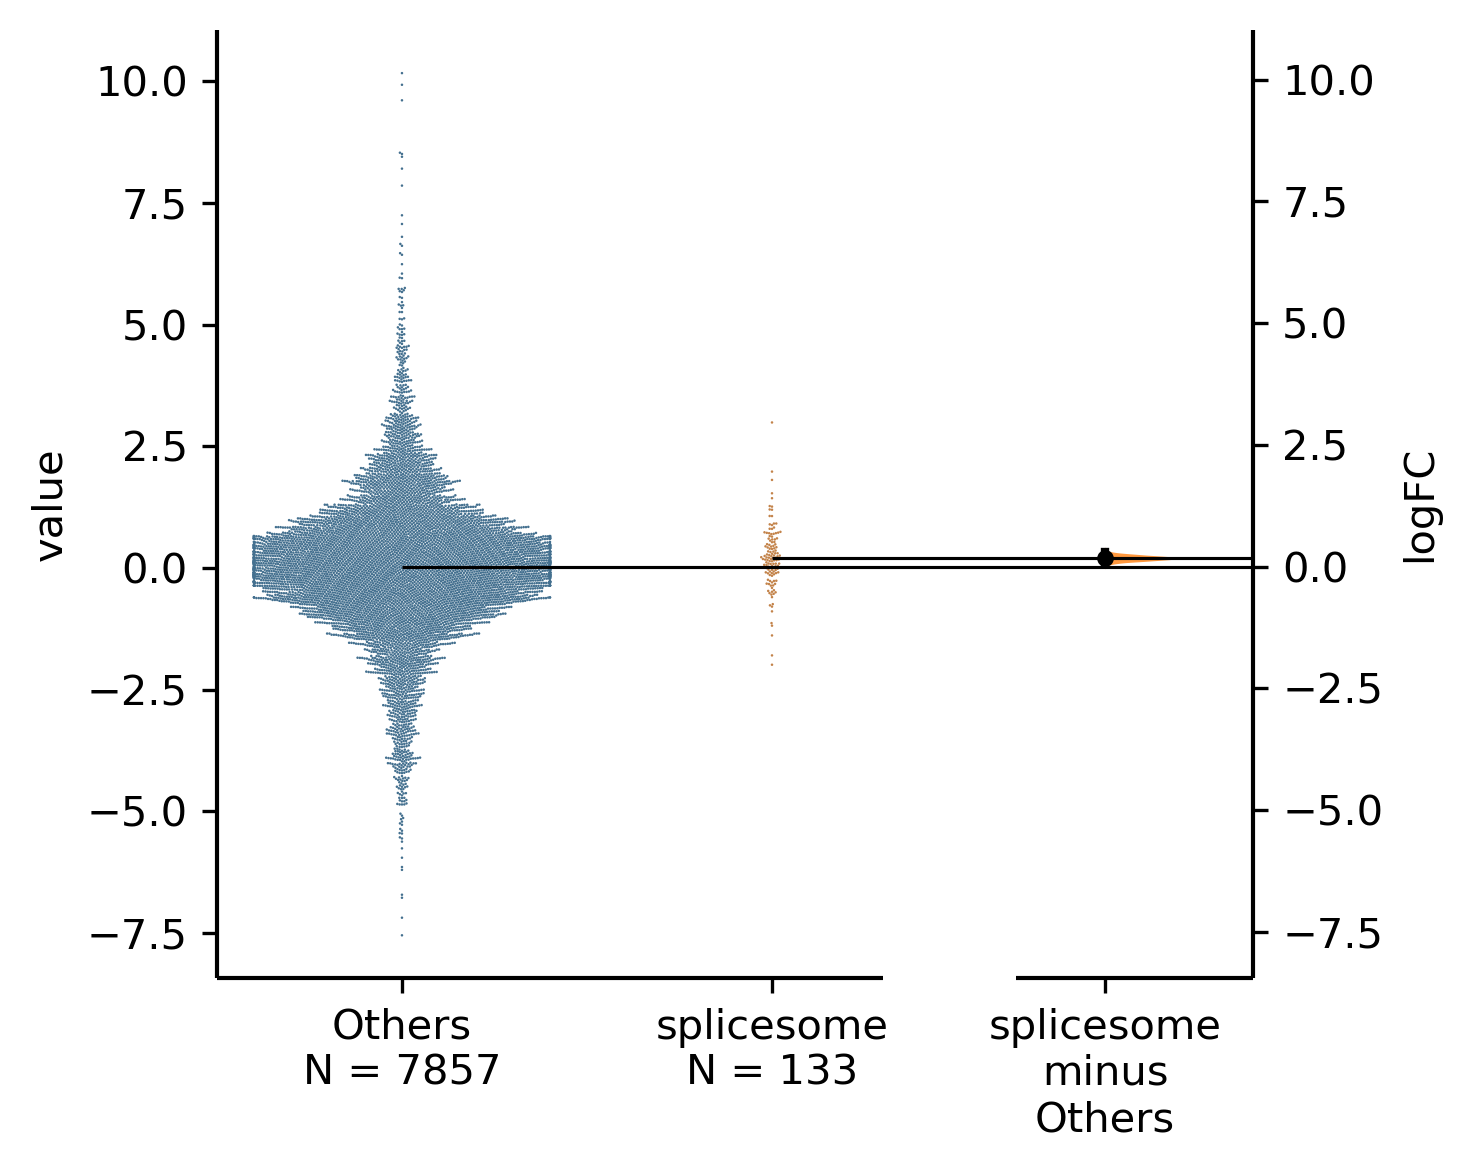

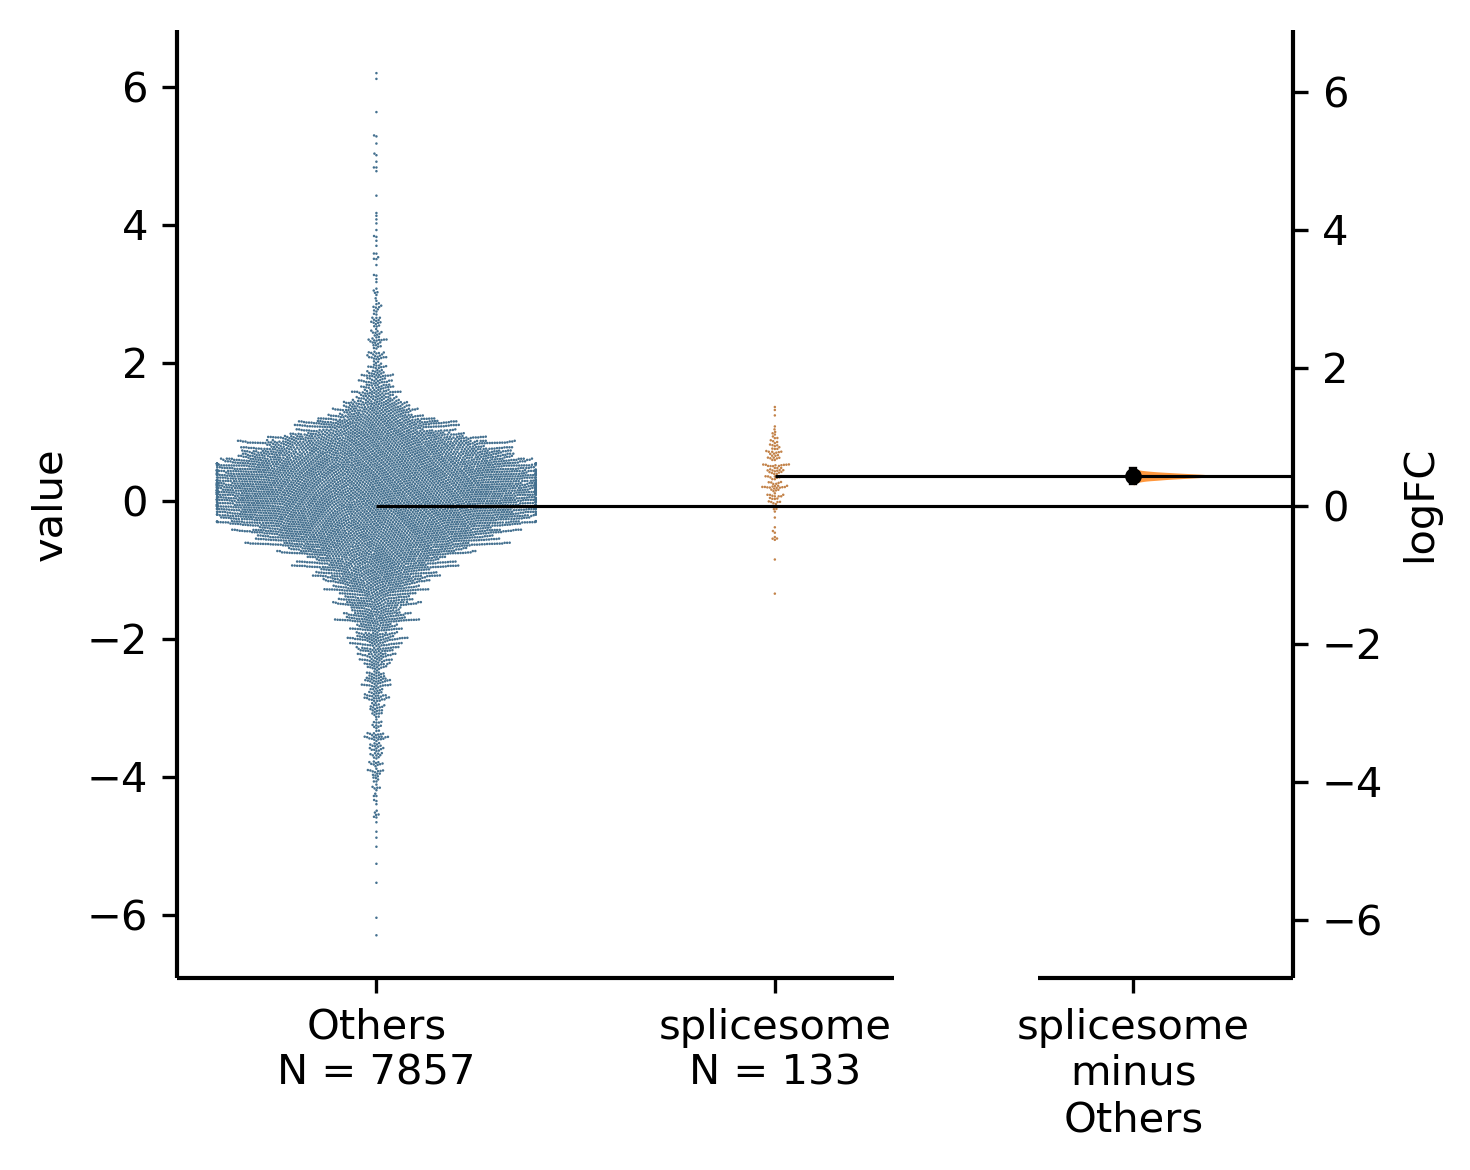

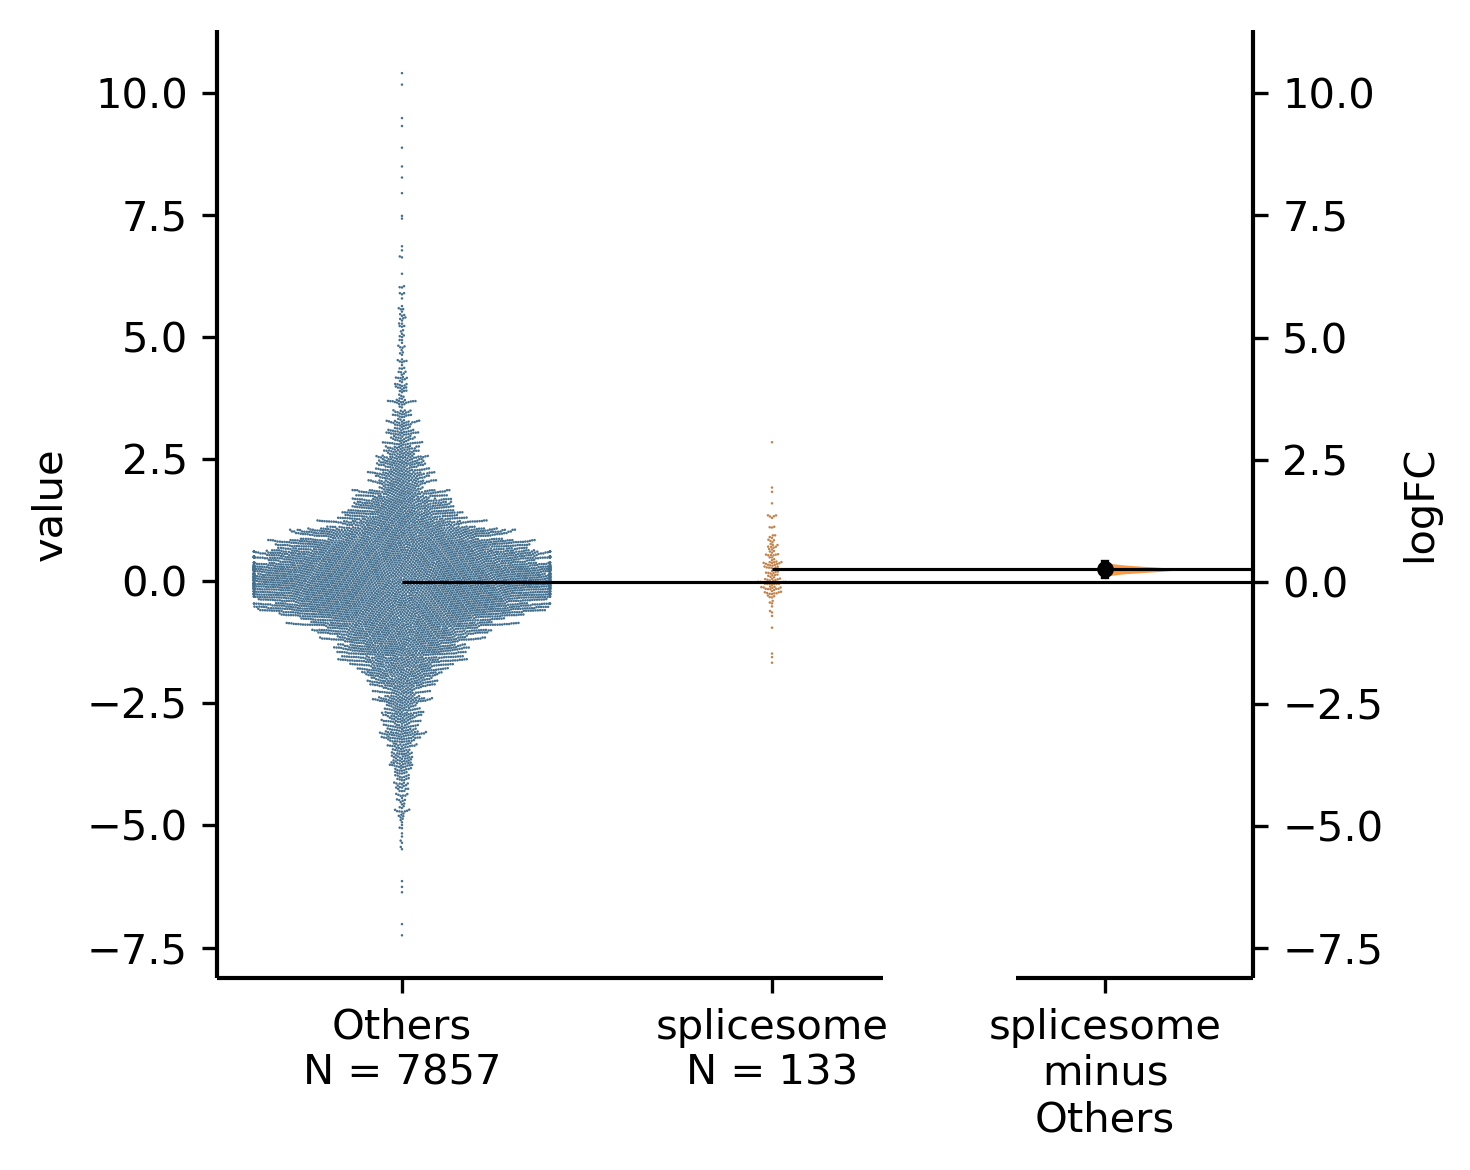

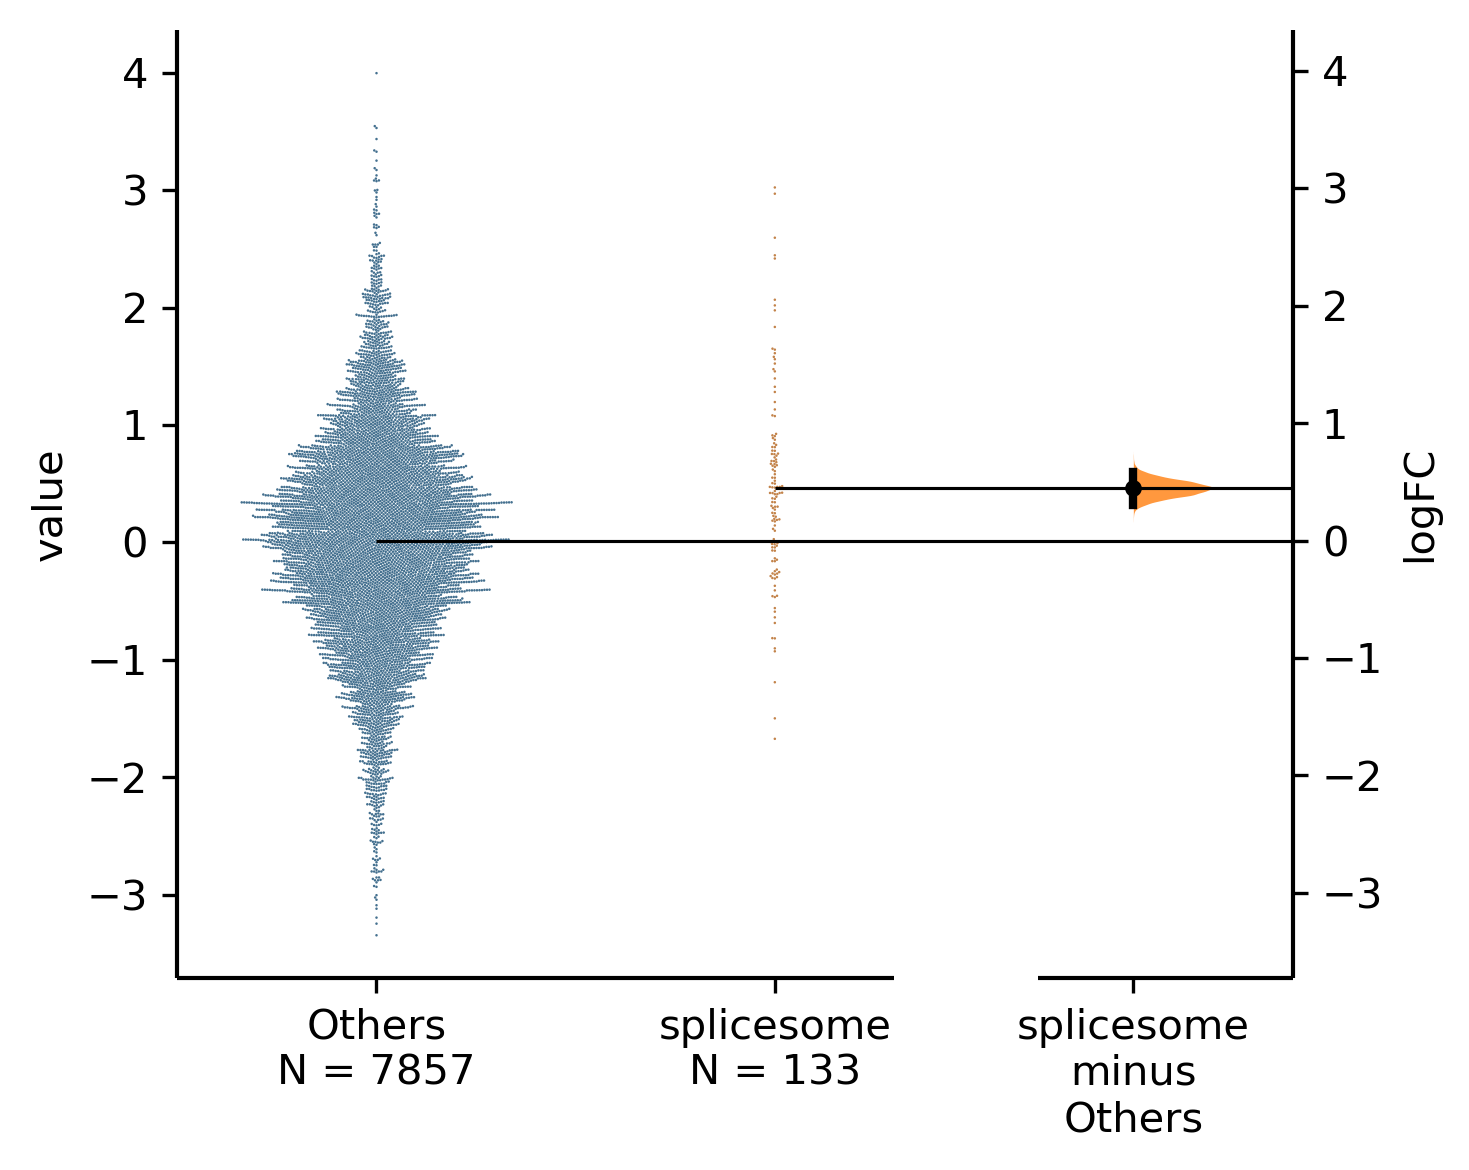

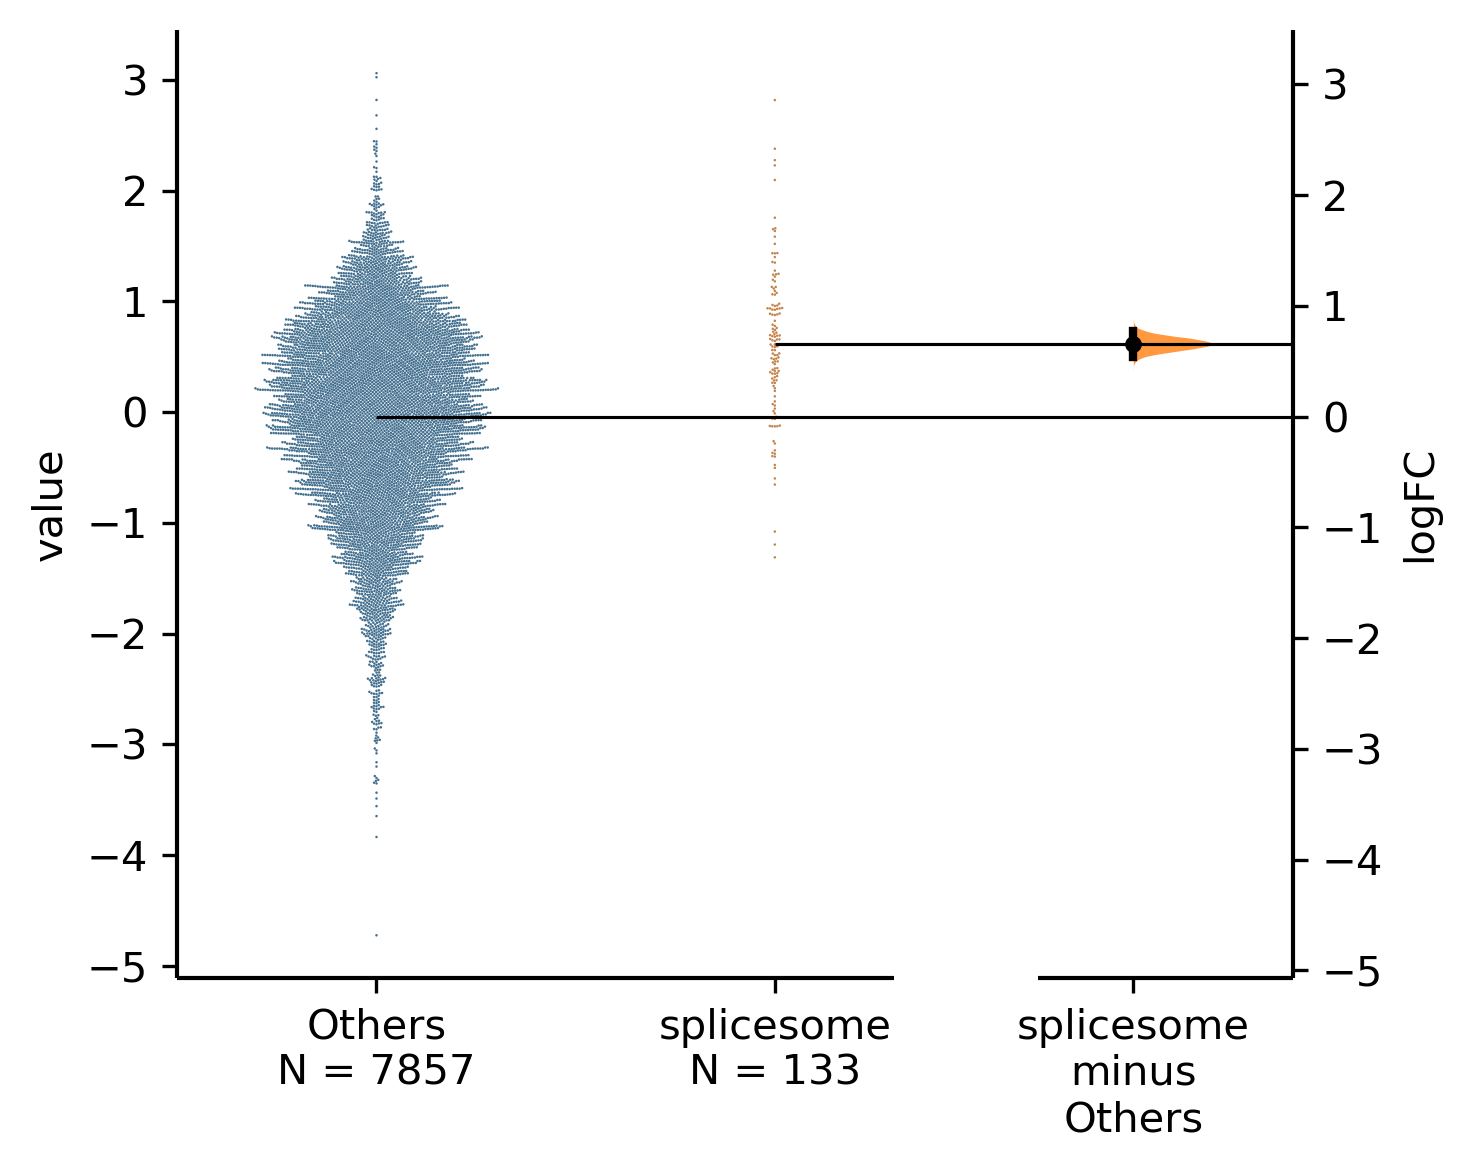

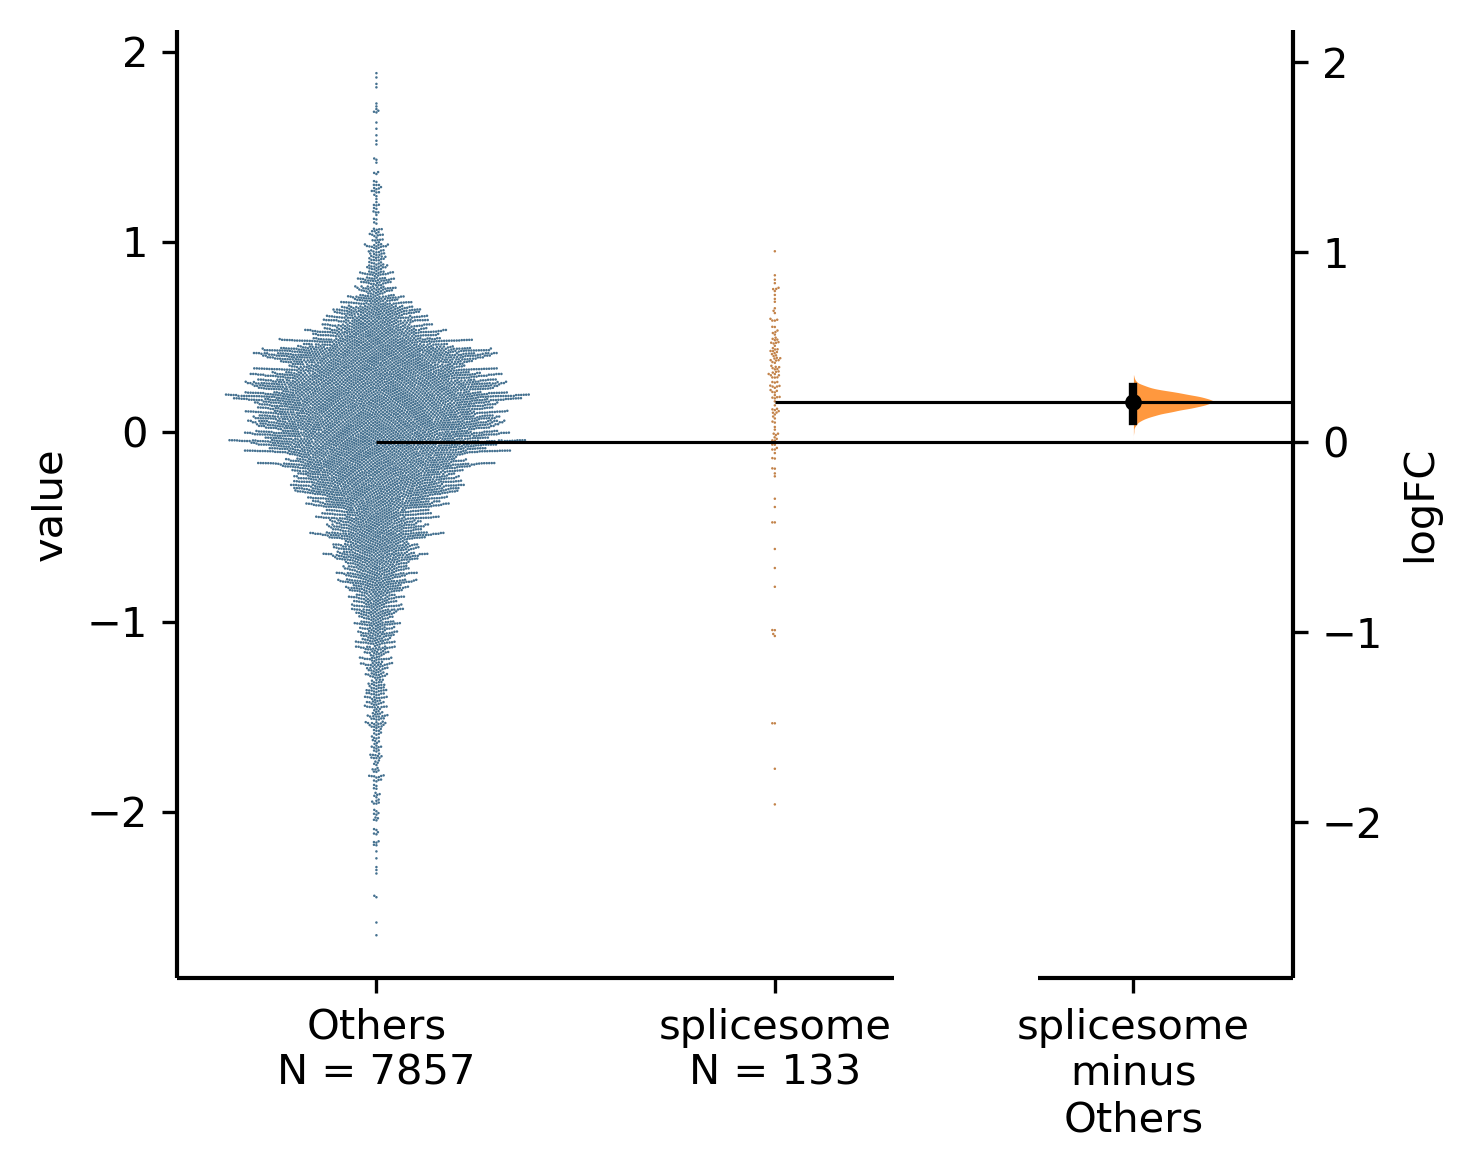

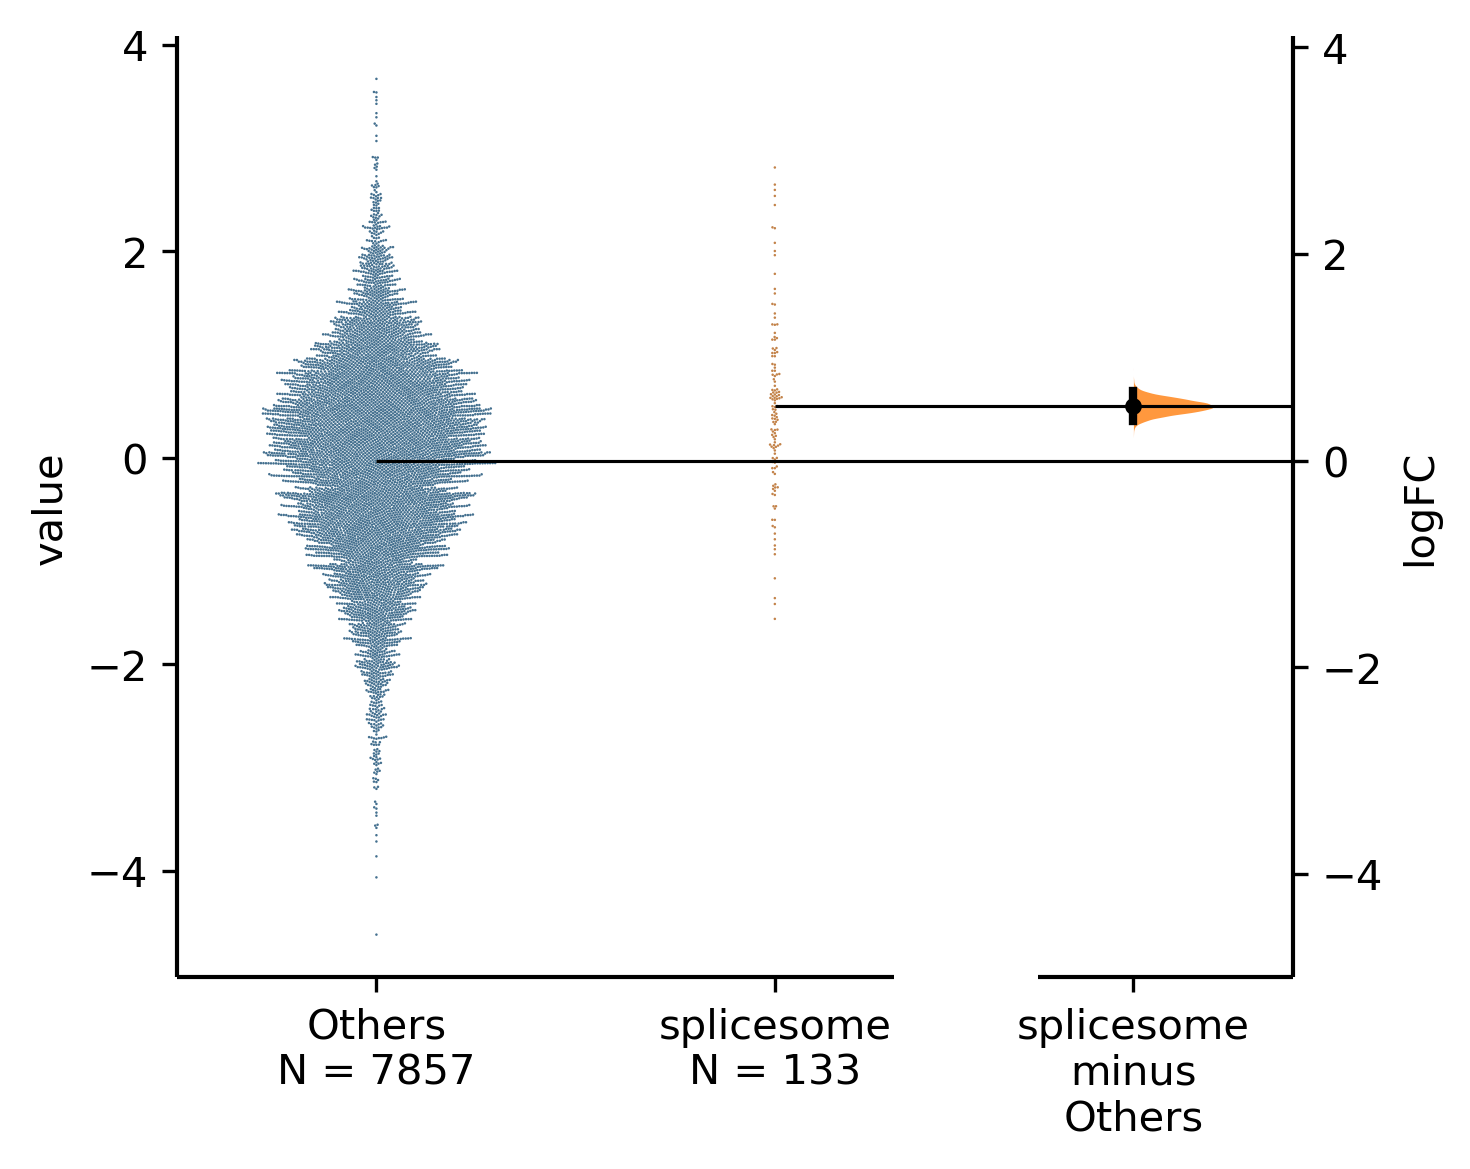

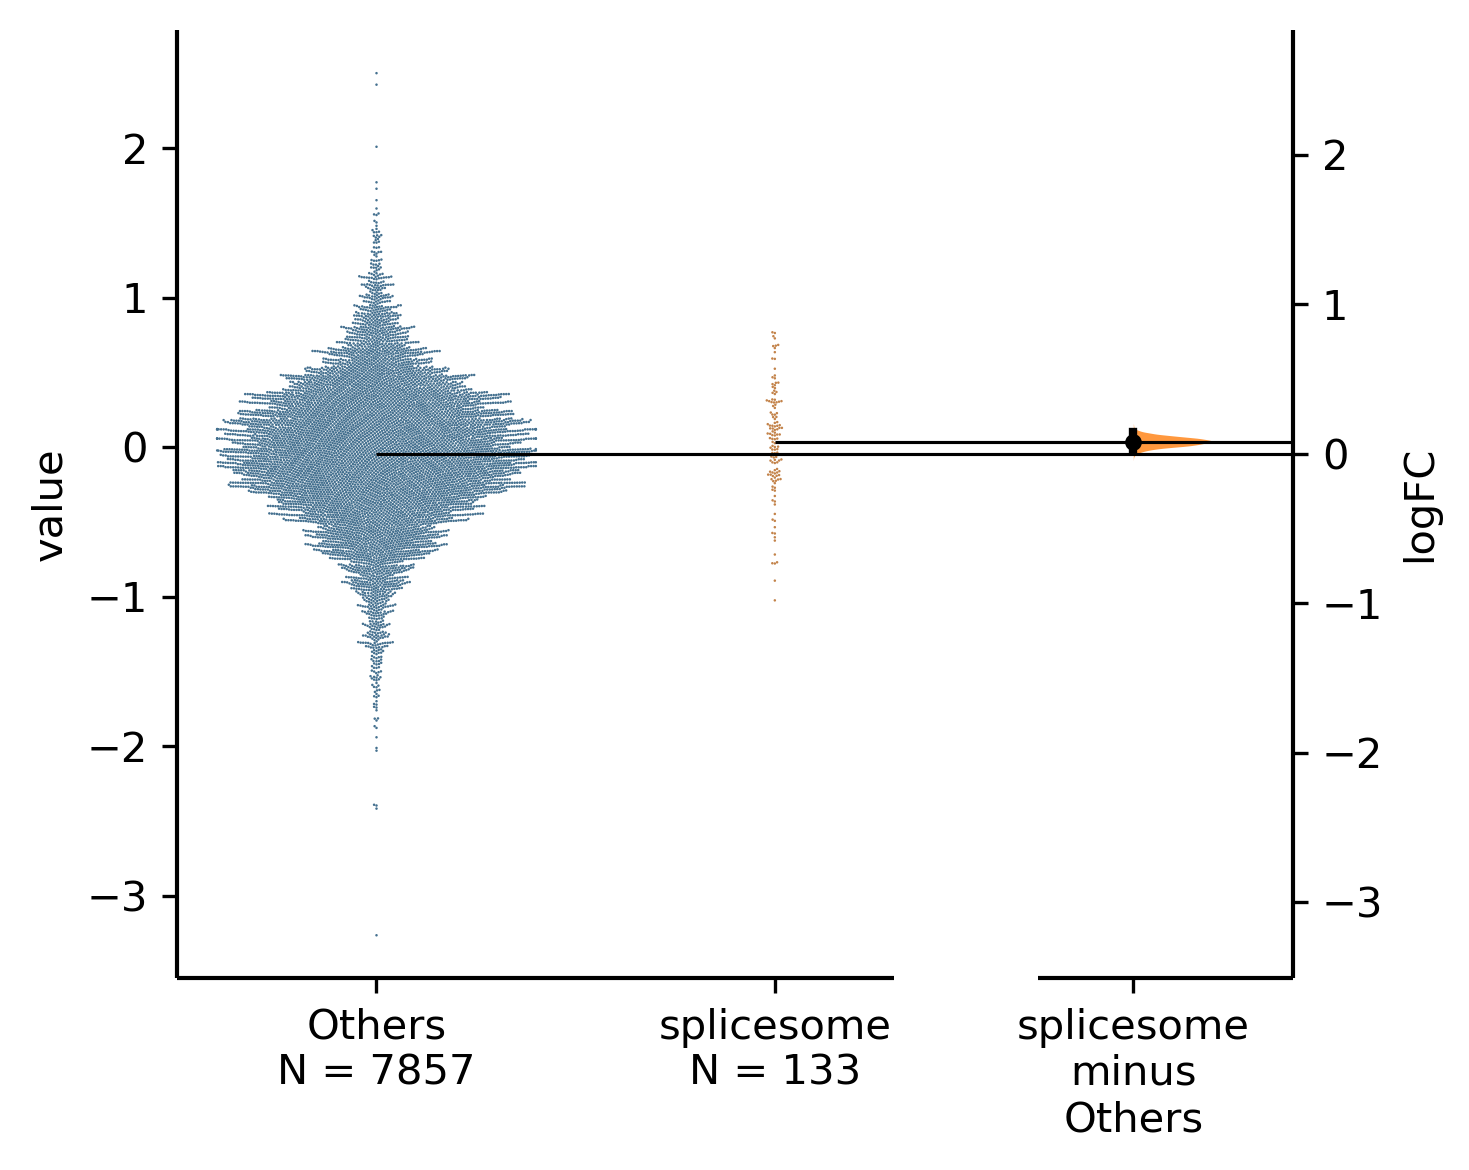

In [42]:
!mkdir coding/$groupLabel
for i in range(0,len(files)):
    fileLabel = files[i].split("/")[-1][:-4]
    deseq_out = pd.read_csv(files[i])
    Groups = []
    for idx,gene in deseq_out.iterrows():
        if gene['Unnamed: 0'] in AccSelected:
            Groups.append(groupLabel)
        else:
            Groups.append('Others')
    deseq_out.insert(1, "Group", Groups, True) 
    data = {'Others':deseq_out['log2FoldChange'][deseq_out['Group']=="Others"], groupLabel:deseq_out['log2FoldChange'][deseq_out['Group']==groupLabel]}
    df = pd.DataFrame(data) 
    df_dabest = dabest.load(data = df,idx=("Others",groupLabel),paired=False,resamples=20000)
    plt=df_dabest.mean_diff.plot(swarmplot_kwargs={"size":0.6},contrast_label="logFC",dpi=300,es_marker_size=3);
    plt.savefig('coding/'+groupLabel+'/'+fileLabel+'_dabest.png',dpi=300)


In [31]:
!mkdir fpUTR/$groupLabel